# Product Affinity - Pricing

## 01-Importing Packages

In [ ]:
#Install Packs to necessary for work

In [ ]:
!pip install -U pandas-profiling

In [ ]:
!pip install vaex

In [ ]:
!pip install parquet

In [ ]:
!pip install pyarrow

In [ ]:
!pip install snappy

In [ ]:
!pip install psycopg2

In [ ]:
!pip install lightgbm

In [ ]:
!pip install fsspec

In [ ]:
!pip install interpret

In [ ]:
!pip install pyspark

In [ ]:
!pip install catboost

In [ ]:
!pip install imblearn

In [ ]:
!pip install scikit-plot

In [1]:
#Import Libs to necessary for work
import pandas as pd
import numpy as np
import sklearn as sk
import vaex
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statistics import mode
from pandas.api.types import is_object_dtype
from pandas_profiling import ProfileReport
import psycopg2 as pg2
import parquet
import gc
import pyarrow as pa
import pyarrow.parquet as pq
import seaborn as sns
import math
import settings_postgre as settings
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

## 02-Reading Data

In [13]:
#Dataset is large size 11Gb. Don't possible load on my computer.
#I have this requirements:
    #16Gb RAM
    #i5 2.7GHz
    #Storage 465Gb

#### 02.01-Simple Read

In [8]:
#Path to file
FileNameLoad = "Base/Affinity.csv"

In [11]:
#Extracting only 10.000 rows
df10k = pd.read_csv(FileNameLoad, engine='python', nrows=10000)

In [12]:
df10k.head()

,cod_cia,cod_filial,nom_filial,contrato,apolice,emissao,item,dt_emissao,dt_inivig,dt_fimvig,...,RetidoAPP_oco,salvadoapp_oco,RetidoCarroce_oco,salvadocarroce_oco,RetidoCarrocePP_oco,salvadoCarrocepp_oco,RetidoCarrocePT_oco,salvadoCarrocept_oco,RetidoCarroceRT_oco,salvadoCarrocert_oco
0,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 02.02-Reading Data for Vaex

In [14]:
#I tried convert big file on vaex, but the size became same

In [ ]:
vaex_df = vaex.from_csv(FileNameLoad, convert=True, chunk_size=5_000_000)

In [ ]:
df = vaex.open('Affinity.hdf5')

In [ ]:
df.to_csv(FileNameOut,index=False)

#### 02.03- Data for Parquet

In [15]:
#I succeed convert big file on six short files in parquet.
#It's best result into now, the results are:
    #Original File: 11Gb
    #Total size Parquet File: 436Mb

#### Convert from csv to parquet

In [ ]:
i = 1
for AtivasChunck in pd.read_csv(FileNameLoad, iterator=True, chunksize=800000, low_memory=False):
    print(AtivasChunck.index)
    AtivasChunck.to_parquet("Affinity0" + str(i) + ".parquet")
    gc.collect()
    i+=1

## 03-Exploratory Data Analysis

In [19]:
#I started EDA just only one parquet file
#After initial exploratory I make same process into anothers parquet files

In [17]:
gc.collect()
df = pd.read_parquet("Base/Affinity01.parquet", engine='pyarrow')

In [20]:
#Contar qtde de linhas e colunas
df.shape

(800000, 379)

In [21]:
#Amostra dos dados
df.head()

,cod_cia,cod_filial,nom_filial,contrato,apolice,emissao,item,dt_emissao,dt_inivig,dt_fimvig,...,RetidoAPP_oco,salvadoapp_oco,RetidoCarroce_oco,salvadocarroce_oco,RetidoCarrocePP_oco,salvadoCarrocepp_oco,RetidoCarrocePT_oco,salvadoCarrocept_oco,RetidoCarroceRT_oco,salvadoCarrocert_oco
0,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,1,Centro,22109705,3101609010,2,2,16/04/2016,12/04/2016,01/11/2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Columns: 379 entries, cod_cia to salvadoCarrocert_oco
dtypes: float64(215), int64(29), object(135)
memory usage: 2.3+ GB


In [35]:
df.select_dtypes(include=['int64']).columns

Index(['cod_cia', 'cod_filial', 'contrato', 'apolice', 'emissao', 'item',
       'Cod_prod', 'cd_categoria_tarifaria', 'item_renovado', 'bonus',
       'ano_mod_veic', 'idade_veic', 'cep_tarif', 'FIPE', 'carta_verde_rcdc',
       'carta_verde_rcdm', 'perc_franquia', 'Pct_desc', 'qt_parcelas',
       'cod_forma_pagto', 'cod_segurado', 'cod_interno_corretor',
       'cod_corretor', 'susep_corretor', 'ramo', 'cod_cli', 'cotacao_cpl',
       'anomes_inivig', 'Fipe_infocar'],
      dtype='object')

In [36]:
df.select_dtypes(include=['float64']).columns

Index(['dt_canc_end', 'fator_renovacao', 'fator_otimizado', 'IS_rc_dm',
       'vl_franquia', 'vl_adic_frac', 'pct_comiss', 'pct_desc_com',
       'pct_pro_labore', 'pct_agenciamento',
       ...
       'RetidoAPP_oco', 'salvadoapp_oco', 'RetidoCarroce_oco',
       'salvadocarroce_oco', 'RetidoCarrocePP_oco', 'salvadoCarrocepp_oco',
       'RetidoCarrocePT_oco', 'salvadoCarrocept_oco', 'RetidoCarroceRT_oco',
       'salvadoCarrocert_oco'],
      dtype='object', length=215)

In [37]:
df.select_dtypes(include=['object']).columns

Index(['nom_filial', 'dt_emissao', 'dt_inivig', 'dt_fimvig', 'dt_fimvig_ori',
       'dt_canc_subs', 'dt_canc_apl', 'dt_canc', 'dt_canc_sin', 'Canal',
       ...
       'fx_f_domic_4_residentes', 'fx_f_domic_concess_energia',
       'fx_f_domic_sem_renda', 'fx_f_domic_renda_entre1e2sm',
       'fx_f_domic_rua_com_meiofio', 'fx_f_domic_rua_pavimentada',
       'fx_f_domic_rua_com_identificacao', 'fx_f_domic_rua_com_iluminacao',
       'fx_densidade_populacional', 'mes_ref'],
      dtype='object', length=135)

In [40]:
#created list of columns on same types
typeint = df.select_dtypes(include=['int64']).columns
numerical = typeint.tolist()
typeobject = df.select_dtypes(include=['object']).columns
categorial = typeobject.tolist()
typefloat = df.select_dtypes(include=['float64']).columns
floatype = typefloat.tolist()

In [42]:
#remove columns to datatype list "int", because the values not necessary for EDA
list_remove = ['cod_cia','contrato','apolice','emissao','item','Cod_prod','item_renovado','FIPE','cod_segurado','cod_interno_corretor','cod_corretor','susep','ramo','cod_cli','cotacao_cpl','Fipe_infocar']

In [48]:
for item in numerical:
    if item in list_remove:
        numerical.remove(item)

In [49]:
numerical

['cod_filial',
 'cd_categoria_tarifaria',
 'bonus',
 'ano_mod_veic',
 'idade_veic',
 'cep_tarif',
 'carta_verde_rcdc',
 'carta_verde_rcdm',
 'perc_franquia',
 'Pct_desc',
 'qt_parcelas',
 'cod_forma_pagto',
 'susep_corretor',
 'anomes_inivig']

In [51]:
#Histogram with datatypes "int"

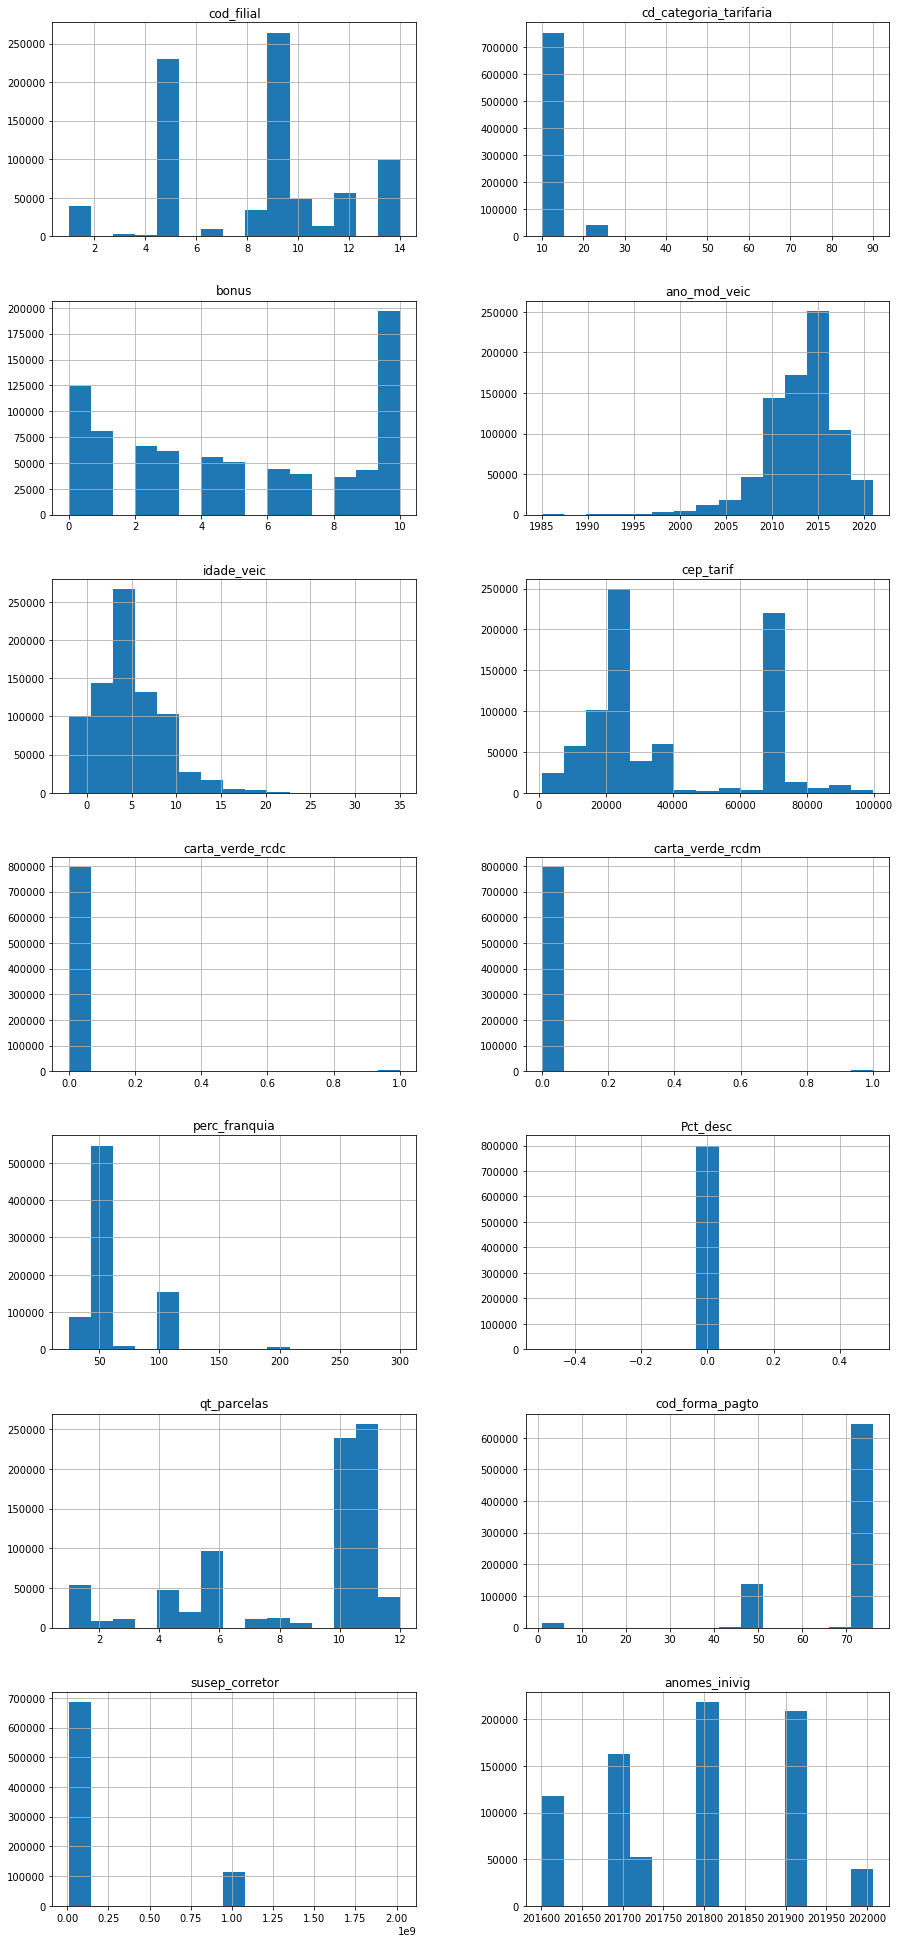

In [50]:
df[numerical].hist(bins=15, figsize=(15, 50), layout=(10, 2));
plt.xticks(rotation=45);

In [86]:
#remove columns to datatype list "object", because the values not necessary for EDA
list_remove = ['tp_segurado','Canal','Canal_Detalhe','dt_emissao','dt_inivig','dt_fimvig','dt_fimvig_ori','dt_canc_subs','dt_canc','dt_canc','dt_canc_apl','dt_canc_sin','apl_renovada','seg_ant','chassi','placa','nom_cli','nom_estabelecimento_cli','dt_nasc_cond_principal','cond_segurado','data_criacao_ctc','nom_prod']

In [97]:
for x in categorial:
    if x in (list_remove):
        categorial.remove(x)

In [99]:
for x in categorial[:3]:
    print(x)
    print(df[x].describe())
    print("\n")

nom_filial
count       800000
unique          12
top       Brasilia
freq        264054
Name: nom_filial, dtype: object


regestudo
count     800000
unique        16
top          RJI
freq      229387
Name: regestudo, dtype: object


grupo_regiao
count                                                800000
unique                                                  316
top       Sul Fluminense (Volta Redonda/Resende/BarraMansa)
freq                                                 199114
Name: grupo_regiao, dtype: object




In [104]:
#I have 135 columns, it's many colums plot on chart, because this I test just 3 cases and I tried count values
    #Result: Don't work, many unique values

In [102]:
cat = categorial[:3]
cat

['nom_filial', 'regestudo', 'grupo_regiao']

C:\Users\rene_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rene_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\rene_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


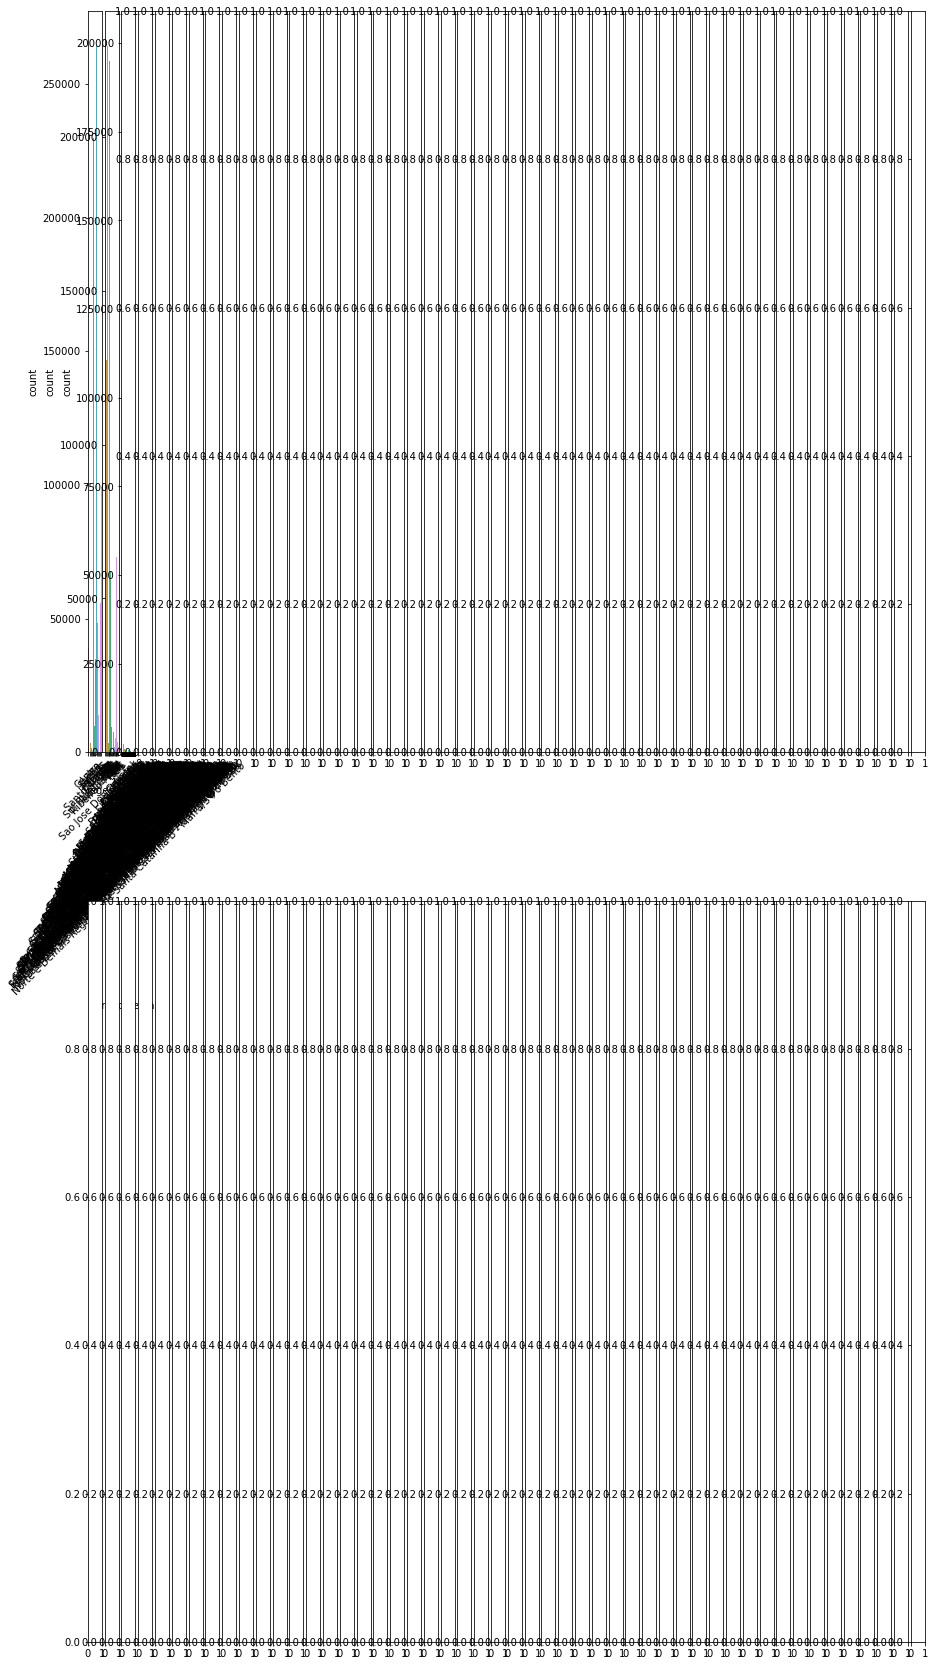

In [103]:
fig, ax = plt.subplots(2, 50, figsize=(15, 30))
for variable, subplot in zip(cat, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(45)

In [107]:
#I test another chart for this data types
    #Result: Don't work, the chart it's better to previusly but my memory almost crash
    #I have many unique values and x base dont see better

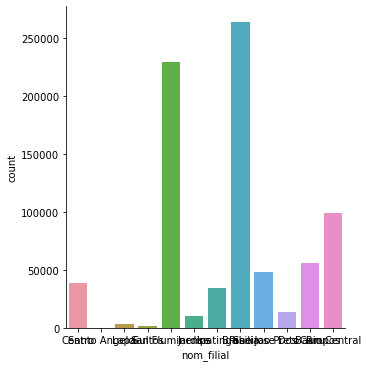

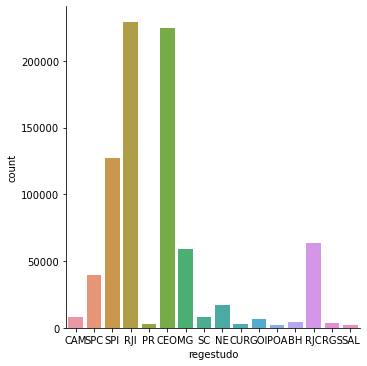

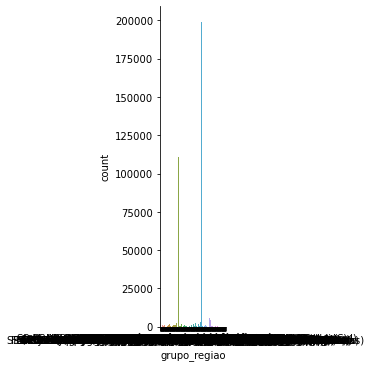

In [106]:
for x_axis in cat:
    sns.catplot(x=x_axis, data=df, kind='count')

In [110]:
#Because that results and the merge anothers parquet files I used Knime and Power Bi to made EDA
#I made two workflow to distict types Discrete and Continuous

In [112]:
# Discrete Workflow

In [23]:
dfdiscrete.head()

,variavel,value_count,value_missing,value_min,value_max,value_unique,array_count_per_unique
0,clau_DAF,4467370,4421439,14,98N,22.0,?(4421439);42(2904);49D(8794);98N(537);61A(687...
1,premio_vidros_exp,4162661,304709,-6.07523614,238.51540041,NaN,6.4788501027
2,IS_rc_dm,4452682,14688,14000,900000,452.0,100000
3,Cod_conta,4462294,5076,1,98000219,2158.0,7.4083861E7(260539);7.4407777E7(260);7.4506037...
4,ASEG_FIPEREG_SEV_PP,1904296,2563074,0,27653.090909,NaN,3452.287062


![CountValues](images/CountValues.png)

In [113]:
# Continuous Workflow

In [20]:
dfcontinuous.head()

,variavel,range,qtde
0,pr_an_casco_emissao_semsubs,"(8989.40,9988.23]",53
1,premio_creserva_exp,None,0
2,endosso,"(724199.53,735682.94]",1735
3,IS_casco_ajust_emissao_semsubs,"(404600.94,420104.82]",2
4,IS_casco_emissao_semsubs,"(296073.76,311577.65]",4


![FrequencyValues](images/FrequencyValues.png)

In [115]:
# Power Bi EDA based process to Knime
#https://app.powerbi.com/groups/me/reports/d47d7598-c647-4d45-9d29-cf180b6c7e58/ReportSection969d785f94bce2720eeb

|![alt](images/PowerBiSumary.png) ||
|-|-|
|![alt](images/PowerBiDiscrite.png) | ![alt](images/PowerBiContinuos.png)

## 04-Transformed

In [117]:
#Based on EDA I selected a few features will make a model to select best features

#### 04.01- Connect data

In [11]:
con = pg2.connect(host=settings.host,
                  user=settings.user,
                  password=settings.password,
                  database=settings.database)

In [3]:
con.autocommit = True
cur = con.cursor()

In [4]:
def select(sql):
    return pd.read_sql(sql,con)

In [14]:
#Keys Values on dataset
keys = ['apolice','mes_ref', 'qtd_casco_tot_oco', 'qtd_cascoPP_oco', 'qtd_cascoPT_oco', 'qtd_cascoRT_oco']
casco = ['fator_rateio_casco', 'Is_casco_exp_full', 'Is_casco_ajustada_exp_full', 'exp_casco', 'premio_casco_exp', 'Is_casco_exp', 'Is_casco_ajustada_exp', 'IS_casco_emissao_semsubs', 'IS_casco_ajust_emissao_semsubs', 'pr_an_casco_emissao_semsubs', 'qt_itens_casco_emissao_semsubs', 'qtd_cascoPP_oco', 'qtd_cascoPT_oco', 'qtd_cascoRT_oco', 'qtd_casco_tot_oco', 'RetidoCascoPP_oco', 'RetidoCascoPT_oco', 'RetidoCascoRT_oco', 'RetidoCasco_oco', 'salvadocasco_oco']
veiculo = ['FIPE', 'vl_franquia', 'ano_mod_veic','Cod_conta']
target = ['qtd_casco_tot_oco','qtd_cascopp_oco','qtd_cascopt_oco','qtd_cascort_oco']

In [14]:
sql = '''
select  "apolice",TO_CHAR(cast("mes_ref" as date), 'YYYYMMDD') as mes_ref, "qtd_casco_tot_oco", "qtd_cascoPP_oco", "qtd_cascoPT_oco", "qtd_cascoRT_oco",
        "fator_rateio_casco", "Is_casco_exp_full", "Is_casco_ajustada_exp_full", "exp_casco", "premio_casco_exp", "Is_casco_exp", "Is_casco_ajustada_exp", "IS_casco_emissao_semsubs", "IS_casco_ajust_emissao_semsubs", "pr_an_casco_emissao_semsubs", "qt_itens_casco_emissao_semsubs", "RetidoCascoPP_oco", "RetidoCascoPT_oco", "RetidoCascoRT_oco", "RetidoCasco_oco", "salvadocasco_oco",
        "FIPE", "vl_franquia", "ano_mod_veic","Cod_conta"
from raw.affinity
'''

In [66]:
df = select(sql)
gc.collect()

22

In [67]:
#Changed header to lowercase
for value_column in df.columns:
    value_lower = str.lower(value_column)
    df.rename(columns={value_column:value_lower},inplace=True)
#Changed header to lowercase
for value_column in df.columns:
    value_lower = str.lower(value_column)
    df.rename(columns={value_column:value_lower},inplace=True)
#Replaced NaN for 0
df = df.replace(np.nan, 0)


In [68]:
#Replaced NaN for 0
df = df.replace(np.nan, 0)

In [69]:
#Replaced every value for 1 to target columns
for per_column in target:
    for value_column in df[per_column].unique():
        if value_column != 0:
            df[per_column] = df[per_column].replace(value_column, 1)

In [73]:
#Changed datetype to int
df['mes_ref'] = df['mes_ref'].astype(int)

In [74]:
df.head()

,apolice,mes_ref,qtd_casco_tot_oco,qtd_cascopp_oco,qtd_cascopt_oco,qtd_cascort_oco,fator_rateio_casco,is_casco_exp_full,is_casco_ajustada_exp_full,exp_casco,...,qt_itens_casco_emissao_semsubs,retidocascopp_oco,retidocascopt_oco,retidocascort_oco,retidocasco_oco,salvadocasco_oco,fipe,vl_franquia,ano_mod_veic,cod_conta
0,3158615478,20190601,0.0,0.0,0.0,0.0,0.804734,68896.0,75785.6,0.082136,...,0.0,0.0,0.0,0.0,0.0,0.0,10054771,1868.5,2019,5553551.0
1,3158615478,20190701,0.0,0.0,0.0,0.0,0.804734,68896.0,75785.6,0.084873,...,0.0,0.0,0.0,0.0,0.0,0.0,10054771,1868.5,2019,5553551.0
2,3158615478,20190801,0.0,0.0,0.0,0.0,0.804734,68896.0,75785.6,0.084873,...,0.0,0.0,0.0,0.0,0.0,0.0,10054771,1868.5,2019,5553551.0
3,3158615478,20190901,0.0,0.0,0.0,0.0,0.804734,68896.0,75785.6,0.082136,...,0.0,0.0,0.0,0.0,0.0,0.0,10054771,1868.5,2019,5553551.0
4,3158615478,20191001,0.0,0.0,0.0,0.0,0.804734,68896.0,75785.6,0.084873,...,0.0,0.0,0.0,0.0,0.0,0.0,10054771,1868.5,2019,5553551.0


In [75]:
#Verificar campos nulos
df.isnull().sum()

apolice                           0
mes_ref                           0
qtd_casco_tot_oco                 0
qtd_cascopp_oco                   0
qtd_cascopt_oco                   0
qtd_cascort_oco                   0
fator_rateio_casco                0
is_casco_exp_full                 0
is_casco_ajustada_exp_full        0
exp_casco                         0
premio_casco_exp                  0
is_casco_exp                      0
is_casco_ajustada_exp             0
is_casco_emissao_semsubs          0
is_casco_ajust_emissao_semsubs    0
pr_an_casco_emissao_semsubs       0
qt_itens_casco_emissao_semsubs    0
retidocascopp_oco                 0
retidocascopt_oco                 0
retidocascort_oco                 0
retidocasco_oco                   0
salvadocasco_oco                  0
fipe                              0
vl_franquia                       0
ano_mod_veic                      0
cod_conta                         0
dtype: int64

In [93]:
df.columns

Index(['apolice', 'mes_ref', 'qtd_casco_tot_oco', 'qtd_cascopp_oco',
       'qtd_cascopt_oco', 'qtd_cascort_oco', 'fator_rateio_casco',
       'is_casco_exp_full', 'is_casco_ajustada_exp_full', 'exp_casco',
       'premio_casco_exp', 'is_casco_exp', 'is_casco_ajustada_exp',
       'is_casco_emissao_semsubs', 'is_casco_ajust_emissao_semsubs',
       'pr_an_casco_emissao_semsubs', 'qt_itens_casco_emissao_semsubs',
       'retidocascopp_oco', 'retidocascopt_oco', 'retidocascort_oco',
       'retidocasco_oco', 'salvadocasco_oco', 'fipe', 'vl_franquia',
       'ano_mod_veic', 'cod_conta'],
      dtype='object')

## 05-Start Select Features

In [166]:
# Standard python libraries
import os
import time
import re
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import LabelEncoder

#### Targets

In [15]:
#FREQUENCIA 
#"frequencia_casco_pp" = "qtd_cascoPP_oco" / "exp_casco"
#"frequencia_casco_pt" = "qtd_cascoPT_oco" / "exp_casco" 
#"frequencia_casco_rt" = "qtd_cascoRT_oco" / "exp_casco"

#GMI
#"gmi_casco_pp" = ("RetidoCascoPP_oco" - "salvadocasco_oco") / ("Is_casco_ajustada_exp_full")
#"gmi_casco_pt" = ("RetidoCascoPT_oco" - "salvadocasco_oco") / ("Is_casco_ajustada_exp_full")
#"gmi_casco_rt" = ("RetidoCascoRT_oco" - "salvadocasco_oco") / ("Is_casco_ajustada_exp_full")

### Categorical Features

In [16]:
gc.collect()
df_categorical_02 = pd.read_parquet("df_categorical_01.parquet", engine='pyarrow')
gc.collect()

0

In [18]:
#Changed header to lowercase
for value_column in df_categorical_02.columns:
    value_lower = str.lower(value_column)
    df_categorical_02.rename(columns={value_column:value_lower},inplace=True)

In [20]:
df_categorical_02 = df_categorical_02.replace(np.nan, 0)

In [22]:
df_categorical_02.head()

,id,adp_blindagem,adp_def_fisico,adp_gas_natural,agrup_metodologia_seg_corr,agrup_veic_emb,cambio,caracteristica,categoria,cidade,...,vba_desc_cr_indi,vba_desc_cr_terc,vba_desc_vidros,veic_zkm_sn,frequencia_casco_pp,frequencia_casco_pt,frequencia_casco_rt,gmi_casco_pp,gmi_casco_pt,gmi_casco_rt
0,1,N,N,N,0,KIA CERATO,Mecanico,Passageiro,Automovel,Buti�,...,0,0,VEICULO IMPORTADO VIP-FONE 0800 701 4120,NAO,0.0,0.0,0.0,0.0,0.0,0.0
1,2,N,N,N,0,KICKS,Automatico,Passageiro,Automovel,Acari,...,0,0,COMPLETO,SIM,0.0,0.0,0.0,0.0,0.0,0.0
2,3,N,N,N,0,KICKS,Automatico,Passageiro,Automovel,Acari,...,0,0,COMPLETO,SIM,0.0,0.0,0.0,0.0,0.0,0.0
3,4,N,N,N,0,KICKS,Automatico,Passageiro,Automovel,Acari,...,0,0,COMPLETO,SIM,0.0,0.0,0.0,0.0,0.0,0.0
4,5,N,N,N,0,KICKS,Automatico,Passageiro,Automovel,Acari,...,0,0,COMPLETO,SIM,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
gc.collect()
df_categorical_02.to_parquet("df_categorical_02.parquet")
gc.collect()

0

In [7]:
gc.collect()
df_categorical_03 = pd.read_parquet("df_categorical_02.parquet", engine='pyarrow')
gc.collect()

0

In [8]:
encoder = LabelEncoder()

In [9]:
colunas = ['adp_blindagem', 'adp_def_fisico', 'adp_gas_natural', 'agrup_metodologia_seg_corr', 'agrup_veic_emb', 'cambio', 'caracteristica', 'categoria', 'cidade', 'clau_daf', 'clau_daf_desc', 'clau_ind_int', 'clau_lojack', 'clau_tipo_antifurto', 'clausulas_daf', 'combustivel', 'configuracao', 'daf_demais_sn', 'daf_dna_security_sn', 'daf_lojack_sn', 'daf_rastreador_sn', 'desc_fidelidade_sn', 'desc_regional', 'desc_utl_veic', 'ds_regbase_emb', 'dsc_especial_0km_sn', 'est_civ_cond_ref', 'estende_cob_18_24', 'fabricante', 'forma_pagto', 'garag_escola', 'garag_pernoite', 'garag_trab', 'garant0km12m_sn', 'garant0km6m_sn', 'grupo_regiao', 'grupo_veic', 'importacao', 'ind_renov_autom', 'km_anual_faixa', 'km_mensal_faixa', 'marca', 'metodologia_seg_corr', 'otimizada_sn', 'perfil_personalizado', 'porte', 'qtd_veic_possue', 'regestudo', 'renov_automatica', 'renov_sin_sn', 'renovacao', 'renovada_sn', 'residentes_18_24', 'sexo_cond_principal', 'sexo_cond_ref', 'sexo_cond_segundo_18_24', 'tipo_antifurto', 'uf', 'uso_comercial', 'vba_desc_assis', 'vba_desc_assresid', 'vba_desc_cr_desc', 'vba_desc_cr_even', 'vba_desc_cr_indi', 'vba_desc_cr_terc', 'vba_desc_vidros', 'veic_zkm_sn']

In [10]:
#Changed categorical to continuous
gc.collect()
for value_column in colunas:
    df_categorical_03[value_column] = encoder.fit_transform(df_categorical_03[value_column])
gc.collect()

0

In [11]:
df_categorical_03.head()

,id,adp_blindagem,adp_def_fisico,adp_gas_natural,agrup_metodologia_seg_corr,agrup_veic_emb,cambio,caracteristica,categoria,cidade,...,vba_desc_cr_indi,vba_desc_cr_terc,vba_desc_vidros,veic_zkm_sn,frequencia_casco_pp,frequencia_casco_pt,frequencia_casco_rt,gmi_casco_pp,gmi_casco_pt,gmi_casco_rt
0,1,0,0,0,0,132,3,3,1,451,...,0,0,11,0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,136,1,3,1,13,...,0,0,7,1,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0,0,0,136,1,3,1,13,...,0,0,7,1,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,136,1,3,1,13,...,0,0,7,1,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0,0,0,136,1,3,1,13,...,0,0,7,1,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
gc.collect()
df_categorical_03.to_parquet("df_categorical_03.parquet")
gc.collect()

0

### Continuous Features

In [16]:
df_continuous = '''
SELECT TO_CHAR(cast("mes_ref" as date), 'YYYYMMDD') as mes_ref, "Carga", "cd_categoria_tarifaria", "codregas", "CV", "fator_rateio_casco", "FIPE", "idade_veic", "IS_casco_ajust_emissao_semsubs", "IS_casco_emissao_semsubs", "MotorCC", "Passageiros", "pct_ajuste_IS", "perc_franquia", "Peso", "Portas", "pr_an_casco_emissao_semsubs", "qt_itens_casco_emissao_semsubs", "vl_adic_frac", "vl_franquia", "bonus", "Cod_agrupador", "Cod_conta", "cod_filial", "cod_forma_pagto", "Cod_plano", "fator_desc_com", "fator_otimizado", "fator_renovacao", "idade_cond_principal", "pct_agenciamento", "pct_comiss", "Pct_desc", "pct_desc_agravo", "pct_desc_com", "pct_desc_especial", "pct_desc_fidelidade", "pct_desc_promocional", "pct_pro_labore", "PONTUACAO_TOTAL_CALCULADA", "qt_parcelas", "densidade_populacional", "f_domic_4_residentes", "f_domic_concess_energia", "f_domic_hab_proprietario", "f_domic_renda_entre1e2sm", "f_domic_rua_com_identificacao", "f_domic_rua_com_iluminacao", "f_domic_rua_com_meiofio", "f_domic_rua_pavimentada", "f_domic_sem_renda", "f_idosos", "num_domicilios_particulares", "num_moradores", "num_pontosdeonibus_4km", "num_ruas_4km", "populacao", "qtd_sinistros_cpf_rns", "qtd_sinistros_pt_cpf_rns", "qtd_sinistros_roubo_cpf_rns", "qtdrenov", "renda_mensal_media", "score_cred", "score_cred_trans", "score_personalizado", "tempo_ultimo_sinistro_cpf_rns", "tempo_ultimo_sinistro_pt_cpf", "veloc_media_4km", "ASEG_FIPE_FRQ_INC", "ASEG_FIPE_FRQ_OUTROS", "ASEG_FIPE_FRQ_PP", "ASEG_FIPE_FRQ_PT", "ASEG_FIPE_FRQ_RT", "ASEG_FIPE_SEV_INC", "ASEG_FIPE_SEV_OUTROS", "ASEG_FIPE_SEV_PP", "ASEG_FIPE_SEV_PT", "ASEG_FIPE_SEV_RT", "ASEG_FIPEREG_FRQ_INC", "ASEG_FIPEREG_FRQ_OUTROS", "ASEG_FIPEREG_FRQ_PP", "ASEG_FIPEREG_FRQ_PT", "ASEG_FIPEREG_FRQ_RT", "ASEG_FIPEREG_SEV_INC", "ASEG_FIPEREG_SEV_OUTROS", "ASEG_FIPEREG_SEV_PP", "ASEG_FIPEREG_SEV_PT", "ASEG_FIPEREG_SEV_RT", "ASEG_REG_FRQ_INC", "ASEG_REG_FRQ_OUTROS", "ASEG_REG_FRQ_PP", "ASEG_REG_FRQ_PT", "ASEG_REG_FRQ_RT", "ASEG_REG_SEV_INC", "ASEG_REG_SEV_OUTROS", "ASEG_REG_SEV_PP", "ASEG_REG_SEV_PT", "ASEG_REG_SEV_RT", "frequencia_casco_pp", "gmi_casco_pp"
FROM raw.affinity
'''

In [17]:
gc.collect()
df_continuous = select(df_continuous)
gc.collect()

0

In [18]:
df_continuous.to_parquet("df_continuous_01.parquet")
gc.collect()

0

In [8]:
gc.collect()
df_continuous_02 = pd.read_parquet("df_continuous_01.parquet", engine='pyarrow')
gc.collect()

0

In [9]:
df_continuous_02.shape

(4467370, 100)

In [10]:
#Changed header to lowercase
for value_column in df_continuous_02.columns:
    value_lower = str.lower(value_column)
    df_continuous_02.rename(columns={value_column:value_lower},inplace=True)

In [11]:
#Replaced NaN for 0
df_continuous_02 = df_continuous_02.replace(np.nan, 0)

In [13]:
#Changed datetype to int
df_continuous_02['mes_ref'] = df_continuous_02['mes_ref'].astype(int)
df_continuous_02['portas'] = df_continuous_02['portas'].astype(int)
df_continuous_02['cd_categoria_tarifaria'] = df_continuous_02['cd_categoria_tarifaria'].astype(int)
df_continuous_02['idade_veic'] = df_continuous_02['idade_veic'].astype(int)
df_continuous_02['passageiros'] = df_continuous_02['passageiros'].astype(int)
df_continuous_02['bonus'] = df_continuous_02['bonus'].astype(int)
df_continuous_02['cod_filial'] = df_continuous_02['cod_filial'].astype(int)
df_continuous_02['idade_cond_principal'] = df_continuous_02['idade_cond_principal'].astype(int)
df_continuous_02['qt_parcelas'] = df_continuous_02['qt_parcelas'].astype(int)
df_continuous_02['qtdrenov'] = df_continuous_02['qtdrenov'].astype(int)
df_continuous_02['cod_forma_pagto'] = df_continuous_02['cod_forma_pagto'].astype(int)

In [33]:
#This step don't needed anymore
#Replaced every value for 1 to target columns
for per_column in target:
    for value_column in df_continuous[per_column].unique():
        if value_column != 0:
            df_continuous[per_column] = df_continuous[per_column].replace(value_column, 1)

In [18]:
for minimo in df_continuous.columns:
    if df_continuous[minimo].min() < 0:
        print(minimo, df_continuous[minimo].min())

gmi_casco_pp -0.3387905374


In [ ]:
# Corrigir a Idade do Veiculo que estavam com valores negativos

In [19]:
df_continuous_02['idade_veic'] = df_continuous_02['idade_veic'].replace(-1, 0)

In [20]:
df_continuous_02['pct_desc_agravo'] = (df_continuous_02['pct_desc_agravo'] /100) + 1

In [17]:
df_continuous_02.head()

,mes_ref,carga,cd_categoria_tarifaria,codregas,cv,fator_rateio_casco,fipe,idade_veic,is_casco_ajust_emissao_semsubs,is_casco_emissao_semsubs,...,aseg_reg_frq_pp,aseg_reg_frq_pt,aseg_reg_frq_rt,aseg_reg_sev_inc,aseg_reg_sev_outros,aseg_reg_sev_pp,aseg_reg_sev_pt,aseg_reg_sev_rt,frequencia_casco_pp,gmi_casco_pp
0,20200301,0.0,10,8.0,136.0,0.686313,10020621,10,0.0,0.0,...,0.054757,0.009192,0.004121,29234.300000,841.078210,5778.657811,38294.30654,49069.090200,0.0,0.0
1,20200401,0.0,10,8.0,136.0,0.686313,10020621,10,0.0,0.0,...,0.054757,0.009192,0.004121,29234.300000,841.078210,5778.657811,38294.30654,49069.090200,0.0,0.0
2,20200501,0.0,10,8.0,136.0,0.686313,10020621,10,0.0,0.0,...,0.054757,0.009192,0.004121,29234.300000,841.078210,5778.657811,38294.30654,49069.090200,0.0,0.0
3,20200601,0.0,10,8.0,136.0,0.686313,10020621,10,0.0,0.0,...,0.054757,0.009192,0.004121,29234.300000,841.078210,5778.657811,38294.30654,49069.090200,0.0,0.0
4,20191201,0.0,10,36.0,101.0,0.677951,10052809,1,43155.0,43155.0,...,0.101364,0.009870,0.005193,38163.405405,996.361022,4833.500749,61402.62359,56370.354776,0.0,0.0


In [2]:
#Created version 02 to continuous features parquet file cleaned

In [18]:
df_continuous_02.to_parquet("df_continuous_02.parquet")
gc.collect()

24

<AxesSubplot:>

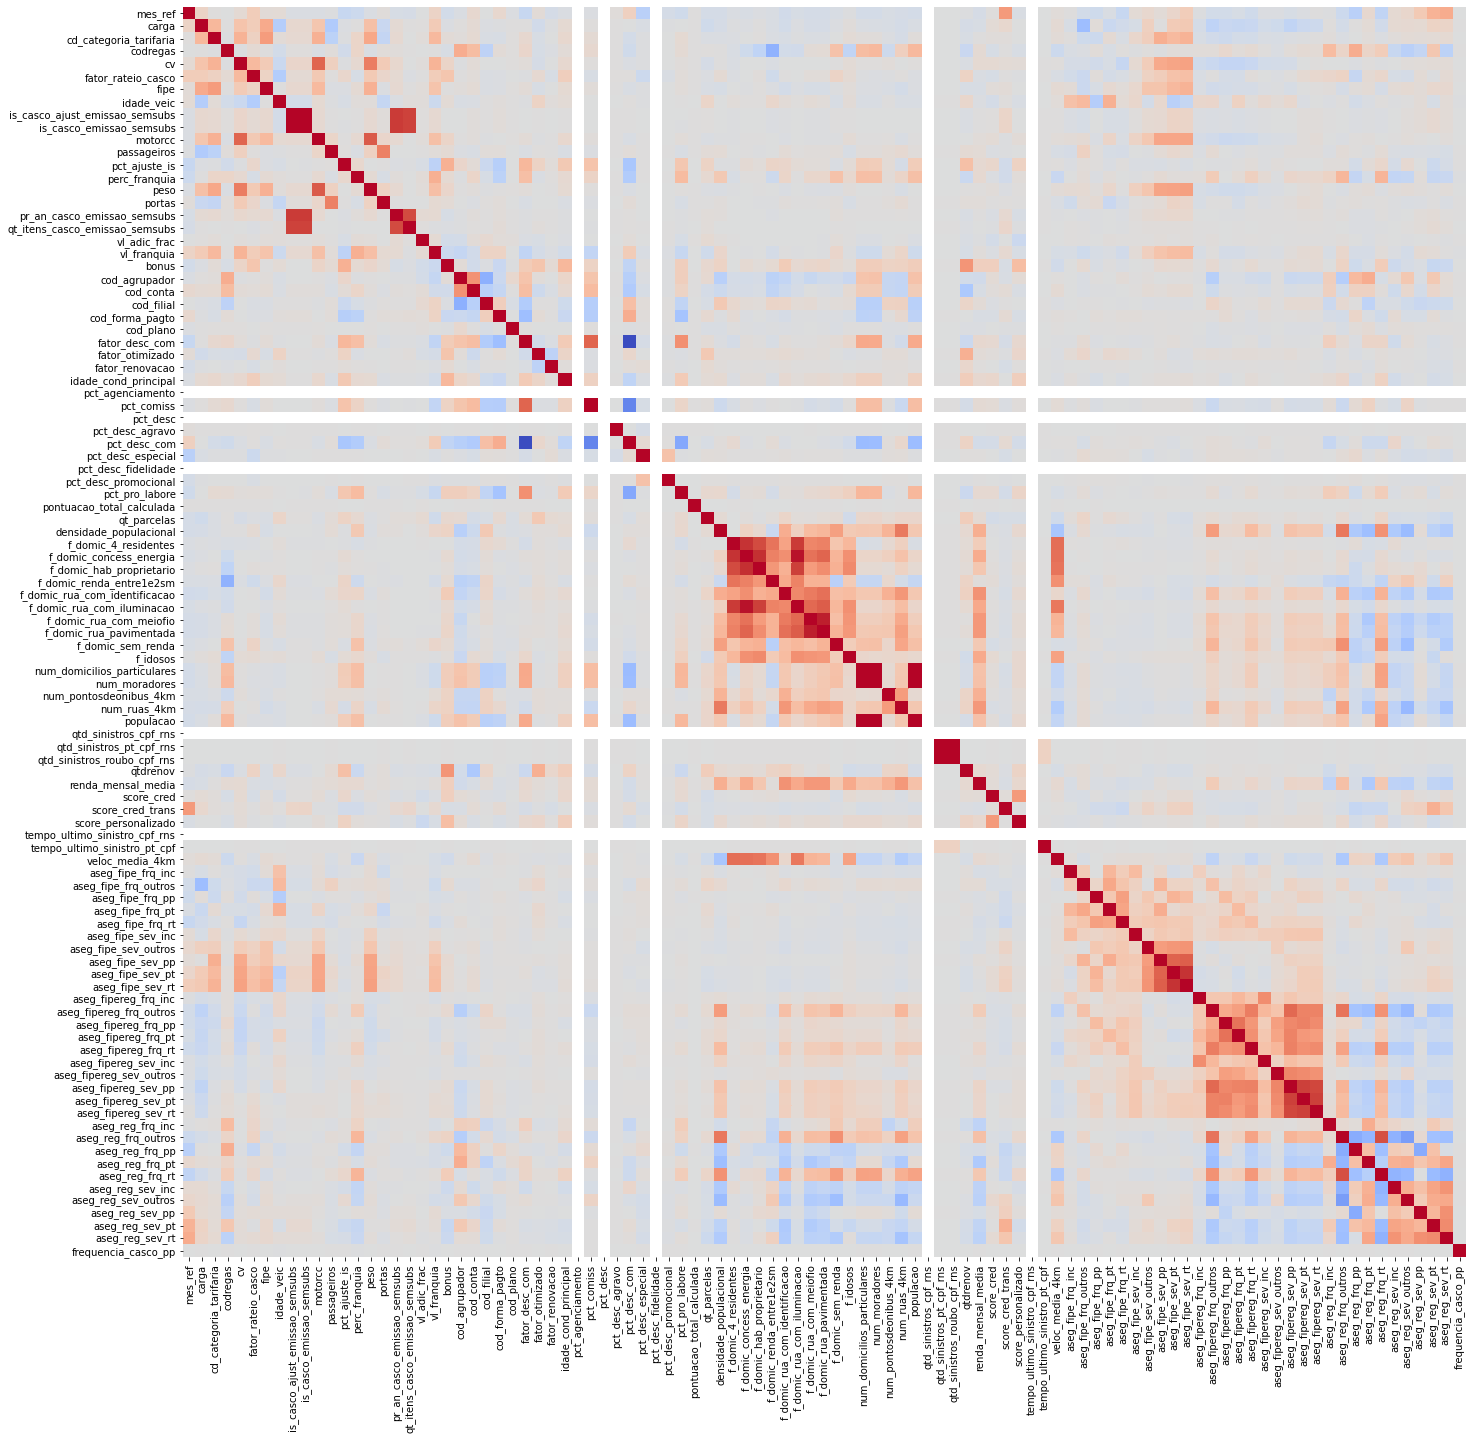

In [18]:
#get correlations of each features in dataset
plt.figure(figsize=(23,23))
plt.xlabel('xlabel', fontsize=20)
plt.ylabel('ylabel', fontsize=20)
sns.heatmap(df_continuous_pp.corr(), cmap="coolwarm", cbar=False, vmin=-1, vmax=1)

### Feature Selection

In [167]:
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [18]:
gc.collect()
df_continuous_pp = pd.read_parquet("df_continuous_02.parquet", engine='pyarrow')
gc.collect()

0

In [8]:
gc.collect()
df_categorical_pp = pd.read_parquet("df_categorical_03.parquet", engine='pyarrow')
gc.collect()

0

In [9]:
gc.collect()
df_categorical_pp.drop(['gmi_casco_pp','gmi_casco_pt','gmi_casco_rt','frequencia_casco_rt','frequencia_casco_pt','id'], axis='columns', inplace=True)
gc.collect()

0

In [15]:
df_categorical_pp.shape

(4467370, 68)

In [ ]:
# Separando o array em componentes de input e output
X = df_continuous_pp.values[:,0:98]
Y = df_continuous_pp.values[:,98]
gc.collect()

In [10]:
gc.collect()
X = df_categorical_pp.values[:,0:67]
Y = df_categorical_pp.values[:,67]
gc.collect()

0

In [16]:
# Split into train and test sets
from sklearn.model_selection import train_test_split

In [12]:
gc.collect()
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

0

#### Using Kbest 

In [20]:
from sklearn.feature_selection import SelectKBest

In [28]:
# Função para seleção de variáveis
best_var = SelectKBest(score_func=f_regression, k=30)
gc.collect()

108

In [29]:
# Executa a função de pontuação em (X, y) e obtém os recursos selecionados
fit = best_var.fit(X, Y)

In [30]:
# Reduz X para os recursos selecionados
features = fit.transform(X)
gc.collect()

40

In [31]:
# Resultados
print('\nNúmero original de features:', X.shape[1])
print('\nNúmero reduzido de features:', features.shape[1])


Número original de features: 67

Número reduzido de features: 30


In [32]:
cols = fit.get_support(indices=True)

In [ ]:
print(df_continuous_pp.iloc[:,cols].columns)

In [33]:
print(df_categorical_pp.iloc[:,cols].columns)

Index(['adp_def_fisico', 'caracteristica', 'categoria', 'combustivel',
       'ds_regbase_emb', 'dsc_especial_0km_sn', 'est_civ_cond_ref',
       'estende_cob_18_24', 'garag_escola', 'garag_trab', 'garant0km12m_sn',
       'garant0km6m_sn', 'grupo_regiao', 'km_anual_faixa', 'otimizada_sn',
       'porte', 'regestudo', 'renov_automatica', 'renov_sin_sn', 'renovada_sn',
       'residentes_18_24', 'sexo_cond_principal', 'sexo_cond_ref',
       'sexo_cond_segundo_18_24', 'uf', 'uso_comercial', 'vba_desc_cr_indi',
       'vba_desc_cr_terc', 'vba_desc_vidros', 'veic_zkm_sn'],
      dtype='object')


#### Using Extra Trees Feature Selection

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import ExtraTreesRegressor

In [35]:
modelo = ExtraTreesRegressor()

In [36]:
gc.collect()
modelo.fit(X, Y)
gc.collect()

24

In [39]:
colunas = df_continuous_pp.columns

In [40]:
importancia_colunas = colunas[0:98]

In [37]:
colunas = df_categorical_pp.columns

In [38]:
importancia_colunas = colunas[0:67]

In [40]:
#Criar uma tabela para gravar as variavéis e as importancias
importancias = pd.DataFrame({'Feature_names':importancia_colunas,'Importancias':modelo.feature_importances_})

In [41]:
importancias['Importancias'] = round(importancias['Importancias'],5)

In [43]:
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 100)
importancias.sort_values(by='Importancias',ascending=False)

,Feature_names,Importancias
0,mes_ref,0.57572
16,pr_an_casco_emissao_semsubs,0.02017
8,is_casco_ajust_emissao_semsubs,0.01677
9,is_casco_emissao_semsubs,0.01555
17,qt_itens_casco_emissao_semsubs,0.01254
64,score_personalizado,0.01252
40,qt_parcelas,0.01082
29,idade_cond_principal,0.01060
62,score_cred,0.00875
55,num_ruas_4km,0.00854


In [42]:
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 100)
importancias.sort_values(by='Importancias',ascending=False)

,Feature_names,Importancias
37,importacao,0.14000
22,desc_regional,0.06101
29,forma_pagto,0.05852
8,cidade,0.03925
35,grupo_regiao,0.03766
4,agrup_veic_emb,0.03345
24,ds_regbase_emb,0.03287
36,grupo_veic,0.03273
40,km_mensal_faixa,0.03147
61,vba_desc_cr_desc,0.02910


### Using Recursive Feature Elimination (RFE)

In [13]:
from sklearn.feature_selection import RFE

In [44]:
clf_lr = LinearRegression()

In [45]:
gc.collect()
lr_baseline_model = clf_lr.fit(X_train,y_train)
gc.collect()

0

In [46]:
rfe = RFE(estimator= clf_lr , step = 1) 

In [47]:
# Fit the function for ranking the features
fit = rfe.fit(X_train, y_train)

In [79]:
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 100)
selected_rfe_features = pd.DataFrame({'Feature':list(df_continuous_pp.iloc[:,0:98].columns),
                                      'Ranking':rfe.ranking_})
selected_rfe_features.sort_values(by='Ranking')

,Feature,Ranking
48,f_domic_rua_com_meiofio,1
68,aseg_fipe_frq_inc,1
82,aseg_fipereg_frq_rt,1
37,pct_desc_promocional,1
38,pct_pro_labore,1
39,pontuacao_total_calculada,1
40,qt_parcelas,1
81,aseg_fipereg_frq_pt,1
42,f_domic_4_residentes,1
43,f_domic_concess_energia,1


### Train a Random Forest Regressor (Baseline Model)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [42]:
#grid_search_cv = GridSearchCV(estimator = RandomForestRegressor(random_state = 42), # Random Forest
#                              param_grid = {'max_depth':range(1,100)}, # Testando número de comprimentos de 1 a 50
#                              scoring='neg_mean_absolute_error', # Métrica neg_mean_absolute_error
#                              cv = 4) ## Cross Validation de 4

In [ ]:
## Grid Search (.fit) para os dados passados
#grid_search_cv.fit(X,Y)
# Observando o melhor comprimento encontrado e o desempenho da métrica
#print('Melhor comprimento máximo: {}'.format(grid_search_cv.best_params_['max_depth']))
#print('Desempenho neg_mean_absolute_error do melhor modelo: {}'.format(round(grid_search_cv.best_score_,2)))

In [14]:
# Create a random forest regressor
rf_clf = RandomForestRegressor(n_estimators = 100, max_features = 'auto', max_depth = 10, bootstrap = False, random_state = 42, verbose = 100)

In [15]:
# Train the regressor
gc.collect()
rf_clf.fit(X_train, y_train)
gc.collect()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
building tree 1 of 100
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  1.3min remaining:    0.0s
building tree 2 of 100
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  2.6min remaining:    0.0s
building tree 3 of 100
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  3.9min remaining:    0.0s
building tree 4 of 100
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  5.2min remaining:    0.0s
building tree 5 of 100
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  6.5min remaining:    0.0s
building tree 6 of 100
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  7.8min remaining:    0.0s
building tree 7 of 100
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  9.1min remaining:    0.0s
building tree 8 of 100
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed: 10.4min remaining:    0.0s
building tree 9 of 100
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 11.7min remaining: 

[Parallel(n_jobs=1)]: Done  79 out of  79 | elapsed: 102.1min remaining:    0.0s
building tree 80 of 100
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 103.5min remaining:    0.0s
building tree 81 of 100
[Parallel(n_jobs=1)]: Done  81 out of  81 | elapsed: 104.8min remaining:    0.0s
building tree 82 of 100
[Parallel(n_jobs=1)]: Done  82 out of  82 | elapsed: 106.1min remaining:    0.0s
building tree 83 of 100
[Parallel(n_jobs=1)]: Done  83 out of  83 | elapsed: 107.4min remaining:    0.0s
building tree 84 of 100
[Parallel(n_jobs=1)]: Done  84 out of  84 | elapsed: 108.7min remaining:    0.0s
building tree 85 of 100
[Parallel(n_jobs=1)]: Done  85 out of  85 | elapsed: 110.0min remaining:    0.0s
building tree 86 of 100
[Parallel(n_jobs=1)]: Done  86 out of  86 | elapsed: 111.3min remaining:    0.0s
building tree 87 of 100
[Parallel(n_jobs=1)]: Done  87 out of  87 | elapsed: 112.5min remaining:    0.0s
building tree 88 of 100
[Parallel(n_jobs=1)]: Done  88 out of  88 | elapsed: 11

24

In [27]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=df_continuous_pp.iloc[:,0:98].columns)

In [28]:
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 100)
selected_random_features = pd.DataFrame({'Feature':list(df_continuous_pp.iloc[:,0:98].columns),
                                      'Ranking':rf_clf.feature_importances_})
selected_random_features.sort_values(by='Ranking', ascending=False)

,Feature,Ranking
16,pr_an_casco_emissao_semsubs,0.328272
0,mes_ref,0.176582
9,is_casco_emissao_semsubs,0.132694
8,is_casco_ajust_emissao_semsubs,0.082194
25,cod_plano,0.037070
20,bonus,0.035826
55,num_ruas_4km,0.032554
17,qt_itens_casco_emissao_semsubs,0.030841
40,qt_parcelas,0.027380
84,aseg_fipereg_sev_outros,0.012051


In [16]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rf_clf.feature_importances_, index=df_categorical_pp.iloc[:,0:67].columns)

In [17]:
pd.set_option('display.max_columns', 2)
pd.set_option('display.max_rows', 100)
selected_random_features = pd.DataFrame({'Feature':list(df_categorical_pp.iloc[:,0:67].columns),
                                      'Ranking':rf_clf.feature_importances_})
selected_random_features.sort_values(by='Ranking', ascending=False)

,Feature,Ranking
29,forma_pagto,0.397540
4,agrup_veic_emb,0.140937
24,ds_regbase_emb,0.123678
1,adp_def_fisico,0.091579
37,importacao,0.068008
36,grupo_veic,0.060954
65,vba_desc_vidros,0.020101
51,renovada_sn,0.018130
46,qtd_veic_possue,0.007910
41,marca,0.006697


In [43]:
feature_selection = pd.read_csv('feature_selection.csv')  

In [45]:
feature_selection.describe()

,Kbest_Select,ExtraTrees_Perc,RFE_Ranking,RandomForest,AVG_Ranking
count,98.000000,98.000000,98.000000,98.000000,98.000000
mean,0.367347,0.010204,0.535706,0.010204,49.500000
std,0.484561,0.057823,0.470807,0.040481,28.434134
min,0.000000,0.000000,0.020000,0.000000,1.000000
25%,0.000000,0.002665,0.038847,0.000481,25.250000
50%,0.000000,0.003780,0.750000,0.000945,49.500000
75%,1.000000,0.005295,1.000000,0.001754,73.750000
max,1.000000,0.575720,1.000000,0.328272,98.000000


In [39]:
feature_selection
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
feature_selection.sort_values(by='AVG_Ranking', ascending=True)

,Feature_names,Kbest_Select,ExtraTrees_Perc,RFE_Ranking,RandomForest,AVG_Ranking
0,qt_itens_casco_emissao_semsubs,1,0.012540,1.000000,0.030841,1
1,bonus,1,0.006900,1.000000,0.035826,2
2,aseg_fipe_frq_pp,1,0.007980,1.000000,0.002103,3
3,idade_veic,1,0.004780,1.000000,0.005154,4
4,qtdrenov,1,0.007880,1.000000,0.001671,5
5,aseg_fipe_frq_pt,1,0.006170,1.000000,0.001729,6
6,aseg_fipe_frq_inc,1,0.006200,1.000000,0.000806,7
7,fator_otimizado,1,0.006160,1.000000,0.000798,8
8,aseg_reg_frq_pp,1,0.003020,1.000000,0.002557,9
9,fator_desc_com,1,0.004260,1.000000,0.001089,10


In [18]:
feature_selection = pd.read_csv('feature_selection_categorical.csv')  

In [22]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
feature_selection.describe()

,Kbest_Select,ExtraTrees_Perc,RFE_Ranking,RandomForest,AVG_Ranking
count,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.223881,0.014925,0.861940,0.014925,34.000000
std,0.250508,0.020899,0.171765,0.054498,19.485037
min,0.000000,0.000010,0.485294,0.000000,1.000000
25%,0.000000,0.001310,0.727941,0.000214,17.500000
50%,0.000000,0.009240,0.970588,0.000821,34.000000
75%,0.500000,0.021665,1.000000,0.003578,50.500000
max,0.500000,0.140000,1.000000,0.397540,67.000000


In [20]:
feature_selection
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
feature_selection.sort_values(by='AVG_Ranking', ascending=True)

,Feature_names,Kbest_Select,ExtraTrees_Perc,RFE_Ranking,RandomForest,AVG_Ranking
0,adp_def_fisico,0.5,0.02004,1.000000,0.091579,1
1,renovada_sn,0.5,0.01730,1.000000,0.018130,2
2,otimizada_sn,0.5,0.01812,1.000000,0.000136,3
3,sexo_cond_ref,0.5,0.01253,1.000000,0.000869,4
4,renov_automatica,0.5,0.01205,1.000000,0.000852,5
5,sexo_cond_principal,0.5,0.01200,1.000000,0.000514,6
6,garag_escola,0.5,0.00924,1.000000,0.001597,7
7,combustivel,0.5,0.00718,1.000000,0.000748,8
8,porte,0.5,0.00581,1.000000,0.001185,9
9,sexo_cond_segundo_18_24,0.5,0.00416,1.000000,0.001629,10


## 06-Start Create Model

In [2]:
from interpret import show
from interpret.data import ClassHistogram
from interpret.data import Marginal
from interpret.glassbox import ExplainableBoostingClassifier
from interpret.glassbox import ExplainableBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn import metrics   #Additional scklearn functions
from matplotlib.pylab import rcParams
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import classification_report
import shap

In [23]:
features_selected = ['score_cred', 'idade_cond_principal', 'score_personalizado', 'vl_franquia', 'num_ruas_4km', 'veloc_media_4km', 'fipe', 'aseg_fipe_sev_outros', 'idade_veic', 'aseg_fipe_sev_rt', 'aseg_fipe_sev_pt', 'qtdrenov', 'aseg_fipe_sev_pp', 'peso', 'bonus', 'cv', 'cod_conta', 'cod_agrupador', 'aseg_fipe_sev_inc', 'motorcc', 'pr_an_casco_emissao_semsubs', 'pct_comiss', 'aseg_reg_sev_inc', 'aseg_reg_sev_rt', 'aseg_reg_sev_pt', 'is_casco_ajust_emissao_semsubs', 'is_casco_emissao_semsubs', 'aseg_reg_sev_pp', 'aseg_reg_sev_outros', 'cod_forma_pagto', 'densidade_populacional', 'renda_mensal_media', 'cod_filial', 'num_moradores', 'populacao', 'num_domicilios_particulares', 'carga', 'aseg_fipereg_sev_outros', 'aseg_fipereg_sev_pp', 'aseg_fipereg_sev_pt', 'aseg_fipereg_sev_rt', 'score_cred_trans', 'perc_franquia', 'codregas', 'pct_pro_labore', 'aseg_fipereg_sev_inc', 'vl_adic_frac', 'cd_categoria_tarifaria', 'qt_itens_casco_emissao_semsubs', 'qt_parcelas', 'qtd_cascopp_oco']
gc.collect()

176

In [38]:
pp_freq_columns = ['qt_itens_casco_emissao_semsubs', 'bonus', 'aseg_fipe_frq_pp','idade_veic', 'qtdrenov', 
'aseg_fipe_frq_inc', 'fator_otimizado', 'aseg_reg_frq_pp', 'fator_desc_com', 'pct_comiss','f_domic_hab_proprietario', 
'pct_pro_labore', 'pct_desc_com', 'pct_ajuste_is', 'aseg_fipereg_frq_outros', 'portas','cd_categoria_tarifaria', 
'veloc_media_4km', 'cod_filial', 'score_cred_trans', 'aseg_fipe_sev_outros','codregas', 'motorcc', 'adp_def_fisico',
'combustivel','estende_cob_18_24', 'garag_escola','otimizada_sn', 'porte', 'renov_automatica', 'renovada_sn',
'sexo_cond_ref','sexo_cond_segundo_18_24','frequencia_casco_pp']

In [39]:
pp_freq_columns_X = ['qt_itens_casco_emissao_semsubs', 'bonus', 'aseg_fipe_frq_pp','idade_veic', 'qtdrenov', 
'aseg_fipe_frq_inc', 'fator_otimizado', 'aseg_reg_frq_pp', 'fator_desc_com', 'pct_comiss','f_domic_hab_proprietario', 
'pct_pro_labore', 'pct_desc_com', 'pct_ajuste_is', 'aseg_fipereg_frq_outros', 'portas','cd_categoria_tarifaria', 
'veloc_media_4km', 'cod_filial', 'score_cred_trans', 'aseg_fipe_sev_outros','codregas', 'motorcc', 'adp_def_fisico',
'combustivel','garag_escola','otimizada_sn', 'porte', 'renov_automatica', 'renovada_sn',
'sexo_cond_ref','sexo_cond_segundo_18_24']

In [26]:
pp_freq_columns_Y =['frequencia_casco_pp']

In [41]:
gc.collect()
df_pp_freq = pd.read_parquet("df_selection.parquet", engine='pyarrow', columns=pp_freq_columns)
gc.collect()

0

In [42]:
df_pp_freq.drop(['estende_cob_18_24'], axis='columns', inplace=True)

In [43]:
df_pp_freq.shape

(4467370, 33)

In [93]:
def plot_feature_importance(importance,names,model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)
    
    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)
    
    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    
    #Define size of bar plot
    plt.figure(figsize=(10,100))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

#### Explainable Boosting Machine (EBM)
https://medium.com/analytics-vidhya/model-interpretation-with-microsofts-interpret-ml-85aa0ad697ae

In [16]:
# Separando o array em componentes de input e output
X = df_pp_freq.values[:,0:32]
Y = df_pp_freq.values[:,32]
gc.collect()

20

In [26]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq.values[:,0:32], 
                                                    df_pp_freq.values[:,32], 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

0

In [75]:
ebm = ExplainableBoostingRegressor(feature_names=pp_freq_columns_X, random_state=42)

In [76]:
gc.collect()
ebm.fit(X_train, Y_train)
gc.collect()

0

In [77]:
gc.collect()
ebm_pred = ebm.predict(X_test)
gc.collect()

336

In [78]:
ebm.score(X_test,Y_test)

0.03544561296334814

In [80]:
ebm_plot = ebm.explain_global(name='EBM FEATURE IMPORTANCE')
show(ebm_plot)

INFO:MainThread:interpret.visual.udash:Generating mini dash
INFO:MainThread:interpret.visual.udash:Generated mini dash


<!-- http://127.0.0.1:7001/2255396914176/ -->

#### Catboost
https://www.youtube.com/watch?v=W9iktBS67Iw

In [32]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq.values[:,0:32], 
                                                    df_pp_freq.values[:,32], 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

20

In [34]:
# Cria a Máquina Preditiva cujo RMSE é a métrica de Performance (erro quadrático médio para avaliar).
cat = CatBoostRegressor(loss_function='RMSE')

In [35]:
# Treino e Teste da Máquina ao mesmo tempo
gc.collect()
cat.fit(X_train, Y_train)
gc.collect()

Learning rate set to 0.162238
0:	learn: 0.6657857	total: 780ms	remaining: 12m 58s
1:	learn: 0.6638435	total: 1.25s	remaining: 10m 21s
2:	learn: 0.6624279	total: 1.68s	remaining: 9m 17s
3:	learn: 0.6613585	total: 2.45s	remaining: 10m 10s
4:	learn: 0.6605493	total: 3.08s	remaining: 10m 13s
5:	learn: 0.6599099	total: 3.56s	remaining: 9m 49s
6:	learn: 0.6594387	total: 4.06s	remaining: 9m 35s
7:	learn: 0.6590821	total: 4.5s	remaining: 9m 18s
8:	learn: 0.6588136	total: 5.34s	remaining: 9m 48s
9:	learn: 0.6585855	total: 5.78s	remaining: 9m 32s
10:	learn: 0.6584146	total: 6.26s	remaining: 9m 22s
11:	learn: 0.6582479	total: 6.76s	remaining: 9m 17s
12:	learn: 0.6580890	total: 7.33s	remaining: 9m 16s
13:	learn: 0.6578866	total: 7.85s	remaining: 9m 12s
14:	learn: 0.6577437	total: 8.28s	remaining: 9m 3s
15:	learn: 0.6576279	total: 8.74s	remaining: 8m 57s
16:	learn: 0.6574876	total: 9.25s	remaining: 8m 54s
17:	learn: 0.6574066	total: 9.72s	remaining: 8m 50s
18:	learn: 0.6573189	total: 10.2s	remainin

158:	learn: 0.6499894	total: 1m 17s	remaining: 6m 51s
159:	learn: 0.6499550	total: 1m 18s	remaining: 6m 51s
160:	learn: 0.6499109	total: 1m 18s	remaining: 6m 50s
161:	learn: 0.6498745	total: 1m 19s	remaining: 6m 49s
162:	learn: 0.6498382	total: 1m 19s	remaining: 6m 49s
163:	learn: 0.6498043	total: 1m 20s	remaining: 6m 48s
164:	learn: 0.6497740	total: 1m 20s	remaining: 6m 47s
165:	learn: 0.6497494	total: 1m 21s	remaining: 6m 47s
166:	learn: 0.6497073	total: 1m 21s	remaining: 6m 46s
167:	learn: 0.6496704	total: 1m 21s	remaining: 6m 45s
168:	learn: 0.6495908	total: 1m 22s	remaining: 6m 45s
169:	learn: 0.6495534	total: 1m 22s	remaining: 6m 44s
170:	learn: 0.6495383	total: 1m 23s	remaining: 6m 43s
171:	learn: 0.6494713	total: 1m 23s	remaining: 6m 42s
172:	learn: 0.6494288	total: 1m 24s	remaining: 6m 42s
173:	learn: 0.6493910	total: 1m 24s	remaining: 6m 41s
174:	learn: 0.6493470	total: 1m 25s	remaining: 6m 40s
175:	learn: 0.6493041	total: 1m 25s	remaining: 6m 40s
176:	learn: 0.6492646	total:

311:	learn: 0.6444353	total: 2m 31s	remaining: 5m 33s
312:	learn: 0.6443777	total: 2m 31s	remaining: 5m 33s
313:	learn: 0.6443471	total: 2m 32s	remaining: 5m 32s
314:	learn: 0.6442957	total: 2m 32s	remaining: 5m 32s
315:	learn: 0.6442573	total: 2m 33s	remaining: 5m 32s
316:	learn: 0.6442101	total: 2m 33s	remaining: 5m 31s
317:	learn: 0.6441856	total: 2m 34s	remaining: 5m 30s
318:	learn: 0.6441575	total: 2m 34s	remaining: 5m 30s
319:	learn: 0.6441344	total: 2m 35s	remaining: 5m 29s
320:	learn: 0.6441095	total: 2m 35s	remaining: 5m 29s
321:	learn: 0.6440682	total: 2m 36s	remaining: 5m 28s
322:	learn: 0.6440482	total: 2m 36s	remaining: 5m 28s
323:	learn: 0.6440196	total: 2m 36s	remaining: 5m 27s
324:	learn: 0.6439946	total: 2m 37s	remaining: 5m 26s
325:	learn: 0.6439654	total: 2m 37s	remaining: 5m 26s
326:	learn: 0.6439140	total: 2m 38s	remaining: 5m 25s
327:	learn: 0.6438668	total: 2m 38s	remaining: 5m 25s
328:	learn: 0.6438313	total: 2m 39s	remaining: 5m 24s
329:	learn: 0.6438024	total:

464:	learn: 0.6398094	total: 3m 42s	remaining: 4m 16s
465:	learn: 0.6397681	total: 3m 43s	remaining: 4m 15s
466:	learn: 0.6397359	total: 3m 43s	remaining: 4m 15s
467:	learn: 0.6397045	total: 3m 44s	remaining: 4m 14s
468:	learn: 0.6396727	total: 3m 44s	remaining: 4m 14s
469:	learn: 0.6396542	total: 3m 45s	remaining: 4m 13s
470:	learn: 0.6396279	total: 3m 45s	remaining: 4m 13s
471:	learn: 0.6395819	total: 3m 46s	remaining: 4m 12s
472:	learn: 0.6395656	total: 3m 46s	remaining: 4m 12s
473:	learn: 0.6395252	total: 3m 46s	remaining: 4m 11s
474:	learn: 0.6394976	total: 3m 47s	remaining: 4m 11s
475:	learn: 0.6394637	total: 3m 47s	remaining: 4m 10s
476:	learn: 0.6394487	total: 3m 48s	remaining: 4m 10s
477:	learn: 0.6394096	total: 3m 48s	remaining: 4m 9s
478:	learn: 0.6393657	total: 3m 49s	remaining: 4m 9s
479:	learn: 0.6393303	total: 3m 49s	remaining: 4m 8s
480:	learn: 0.6393065	total: 3m 50s	remaining: 4m 8s
481:	learn: 0.6392801	total: 3m 50s	remaining: 4m 8s
482:	learn: 0.6392470	total: 3m 5

617:	learn: 0.6354415	total: 4m 57s	remaining: 3m 4s
618:	learn: 0.6354141	total: 4m 58s	remaining: 3m 3s
619:	learn: 0.6353849	total: 4m 58s	remaining: 3m 3s
620:	learn: 0.6353586	total: 4m 59s	remaining: 3m 2s
621:	learn: 0.6353305	total: 4m 59s	remaining: 3m 2s
622:	learn: 0.6353053	total: 5m	remaining: 3m 1s
623:	learn: 0.6352774	total: 5m	remaining: 3m 1s
624:	learn: 0.6352572	total: 5m 1s	remaining: 3m
625:	learn: 0.6352374	total: 5m 1s	remaining: 3m
626:	learn: 0.6352215	total: 5m 2s	remaining: 2m 59s
627:	learn: 0.6351845	total: 5m 2s	remaining: 2m 59s
628:	learn: 0.6351525	total: 5m 3s	remaining: 2m 58s
629:	learn: 0.6351165	total: 5m 3s	remaining: 2m 58s
630:	learn: 0.6350815	total: 5m 4s	remaining: 2m 57s
631:	learn: 0.6350497	total: 5m 4s	remaining: 2m 57s
632:	learn: 0.6350235	total: 5m 5s	remaining: 2m 57s
633:	learn: 0.6349716	total: 5m 5s	remaining: 2m 56s
634:	learn: 0.6349388	total: 5m 6s	remaining: 2m 56s
635:	learn: 0.6348988	total: 5m 6s	remaining: 2m 55s
636:	lear

771:	learn: 0.6313429	total: 6m 9s	remaining: 1m 49s
772:	learn: 0.6312977	total: 6m 9s	remaining: 1m 48s
773:	learn: 0.6312666	total: 6m 10s	remaining: 1m 48s
774:	learn: 0.6312534	total: 6m 10s	remaining: 1m 47s
775:	learn: 0.6312307	total: 6m 11s	remaining: 1m 47s
776:	learn: 0.6312030	total: 6m 11s	remaining: 1m 46s
777:	learn: 0.6311747	total: 6m 12s	remaining: 1m 46s
778:	learn: 0.6311509	total: 6m 12s	remaining: 1m 45s
779:	learn: 0.6311231	total: 6m 13s	remaining: 1m 45s
780:	learn: 0.6310926	total: 6m 13s	remaining: 1m 44s
781:	learn: 0.6310687	total: 6m 14s	remaining: 1m 44s
782:	learn: 0.6310435	total: 6m 14s	remaining: 1m 43s
783:	learn: 0.6310141	total: 6m 15s	remaining: 1m 43s
784:	learn: 0.6309918	total: 6m 15s	remaining: 1m 42s
785:	learn: 0.6309714	total: 6m 16s	remaining: 1m 42s
786:	learn: 0.6309497	total: 6m 16s	remaining: 1m 41s
787:	learn: 0.6309372	total: 6m 16s	remaining: 1m 41s
788:	learn: 0.6309194	total: 6m 17s	remaining: 1m 40s
789:	learn: 0.6309040	total: 6

925:	learn: 0.6276765	total: 7m 20s	remaining: 35.2s
926:	learn: 0.6276697	total: 7m 21s	remaining: 34.7s
927:	learn: 0.6276458	total: 7m 21s	remaining: 34.3s
928:	learn: 0.6276283	total: 7m 22s	remaining: 33.8s
929:	learn: 0.6275967	total: 7m 22s	remaining: 33.3s
930:	learn: 0.6275721	total: 7m 23s	remaining: 32.9s
931:	learn: 0.6275541	total: 7m 23s	remaining: 32.4s
932:	learn: 0.6275269	total: 7m 24s	remaining: 31.9s
933:	learn: 0.6275109	total: 7m 24s	remaining: 31.4s
934:	learn: 0.6274894	total: 7m 25s	remaining: 31s
935:	learn: 0.6274652	total: 7m 25s	remaining: 30.5s
936:	learn: 0.6274361	total: 7m 26s	remaining: 30s
937:	learn: 0.6274083	total: 7m 26s	remaining: 29.5s
938:	learn: 0.6273843	total: 7m 27s	remaining: 29s
939:	learn: 0.6273600	total: 7m 27s	remaining: 28.6s
940:	learn: 0.6273419	total: 7m 27s	remaining: 28.1s
941:	learn: 0.6273107	total: 7m 28s	remaining: 27.6s
942:	learn: 0.6272872	total: 7m 28s	remaining: 27.1s
943:	learn: 0.6272631	total: 7m 29s	remaining: 26.7s

0

In [36]:
gc.collect()
cat_pred = cat.predict(X_test)
gc.collect()

0

In [37]:
cat.score(X_test, Y_test)

0.1145966904036465

In [40]:
rmse = (np.sqrt(mean_squared_error(Y_test, cat_pred)))
r2 = r2_score(Y_test, cat_pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.63
R2: 0.11


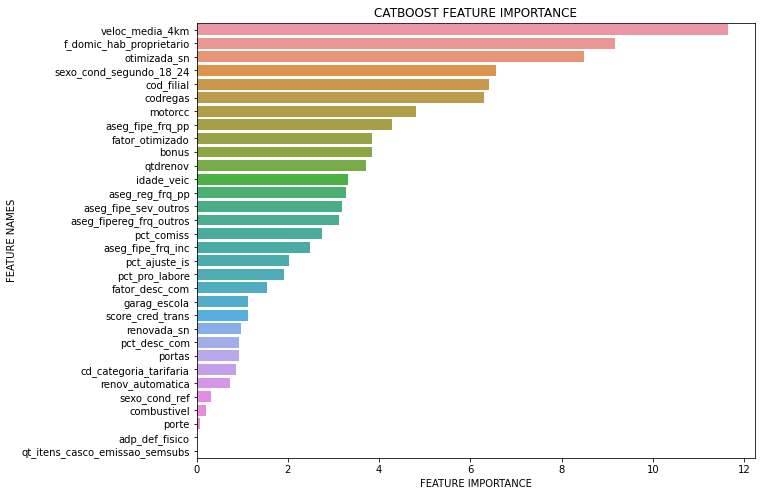

In [82]:
#plot the catboost result
cat_plot = plot_feature_importance(cat.get_feature_importance(),pp_freq_columns_X,'CATBOOST ')

#### GBM

In [56]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq.values[:,0:32], 
                                                    df_pp_freq.values[:,32], 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

18515

In [57]:
#Create a simple GBM Model
gbm = GradientBoostingRegressor(random_state=42)

In [58]:
gc.collect()
gbm.fit(X_train, Y_train)
gc.collect()

0

In [61]:
gbm_pred = gbm.predict(X_test)

In [62]:
gbm.score(X_test,Y_test)

0.034592164372231116

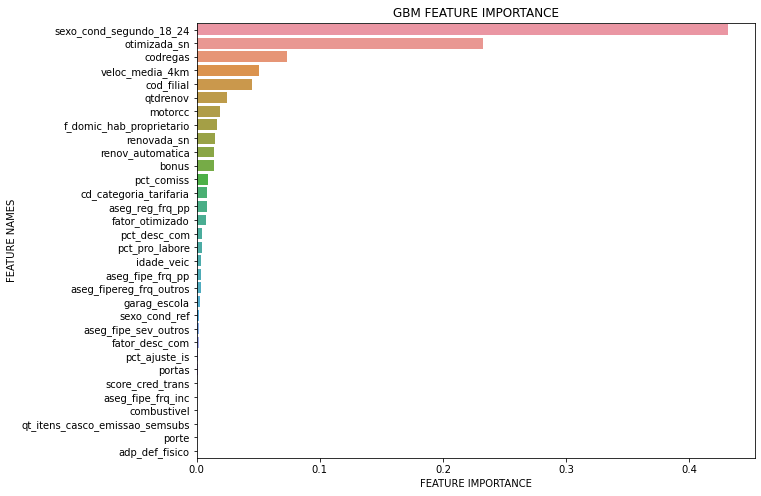

In [85]:
#plot the xgboost result
gbm_plot = plot_feature_importance(gbm.feature_importances_,pp_freq_columns_X,'GBM ')

#### GLM

In [67]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq.values[:,0:32], 
                                                    df_pp_freq.values[:,32], 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

9166

In [68]:
pss = PoissonRegressor()

In [69]:
pss.fit(X_train, Y_train)

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:315: RuntimeWarning:

invalid value encountered in add

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

overflow encountered in multiply

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:315: RuntimeWarning:

overflow encountered in multiply

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_dis

PoissonRegressor()

In [70]:
pss_pred = pss.predict(X_test)

In [74]:
pss.score(X_test, Y_test)

-8.65655727988468e-07

## 07-Summary

In [92]:
ebm_plot = ebm.explain_global(name='EBM FEATURE IMPORTANCE')
show(ebm_plot)

INFO:MainThread:interpret.visual.udash:Generating mini dash
INFO:MainThread:interpret.visual.udash:Generated mini dash


<!-- http://127.0.0.1:7001/2255384072144/ -->

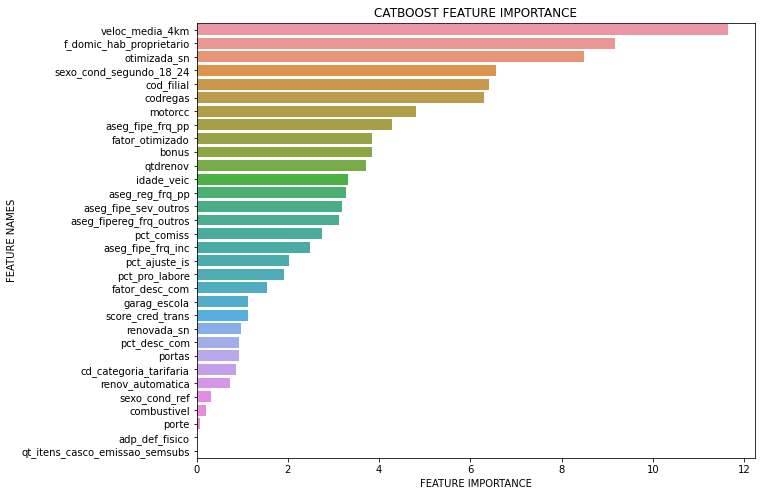

In [93]:
cat_plot = plot_feature_importance(cat.get_feature_importance(),pp_freq_columns_X,'CATBOOST ')

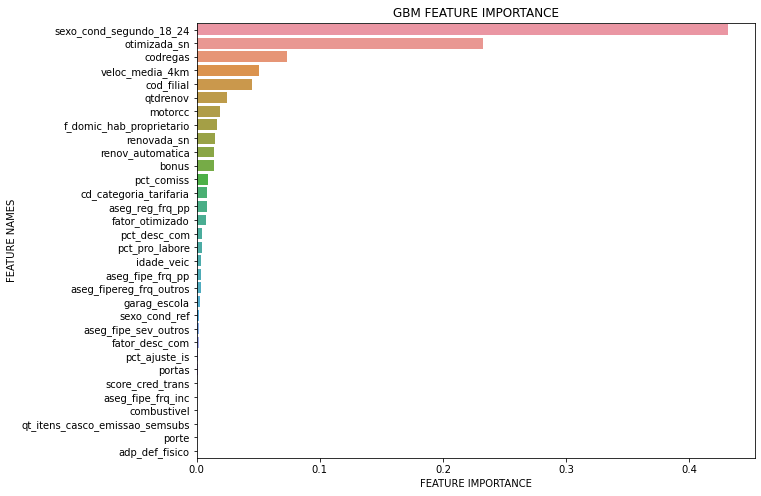

In [94]:
gbm_plot = plot_feature_importance(gbm.feature_importances_,pp_freq_columns_X,'GBM ')

## 07-Downsizing

In [45]:
# CONTAR CLASSES
n_target_count = sum(1 for e in df_pp_freq['frequencia_casco_pp'] if e == 0)
y_target_count = sum(1 for e in df_pp_freq['frequencia_casco_pp'] if e != 0)

In [46]:
print('Y Target:', y_target_count)
print('N Target:', n_target_count)
print('Proportion:', round(n_target_count / y_target_count, 2), ': 1')

Y Target: 16349
N Target: 4451021
Proportion: 272.25 : 1


In [47]:
# Divide by class
n_target = df_pp_freq[df_pp_freq['frequencia_casco_pp'] == 0]
y_target = df_pp_freq[df_pp_freq['frequencia_casco_pp'] != 0]
n_target_sizing = n_target.sample(round(y_target_count * 0.1))

Random under-sampling:
11.7822600000000     8610
12.1750000000000     5065
0.0000000000000      1635
13.0446400000000      833
12.5948300000000      576
14.0480800000000       91
13.5277800000000       89
14.6100000000000       87
20.2916700000000       79
15.2187500000000       74
21.4852900000000       71
17.3928600000000       69
16.6022700000000       69
18.2625000000000       66
19.2236800000000       62
24.3500000000000       62
15.8804300000000       55
26.0892900000000       47
22.8281200000000       43
33.2045500000000       40
40.5833300000000       38
30.4375000000000       36
28.0961500000000       32
23.5645200000000       25
73.0500000000000       24
36.5250000000000       21
45.6562500000000       21
60.8750000000000       19
52.1785700000000       15
182.6250000000000       9
91.3125000000000        8
121.7500000000000       6
365.2500000000000       3
34.7857100000000        1
42.9705900000000        1
35.3467700000000        1
25.1896600000000        1
Name: frequenci

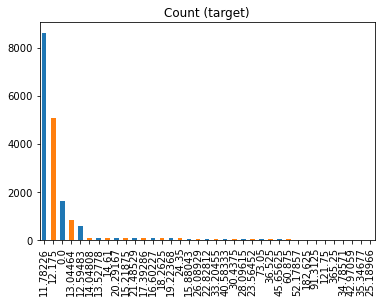

In [48]:
df_pp_freq_sizing = pd.concat([n_target_sizing, y_target], axis=0)
print('Random under-sampling:')
print(df_pp_freq_sizing.frequencia_casco_pp.value_counts())
df_pp_freq_sizing.frequencia_casco_pp.value_counts().plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E']);

#### Explainable Boosting Machine (EBM)
https://medium.com/analytics-vidhya/model-interpretation-with-microsofts-interpret-ml-85aa0ad697ae

In [49]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq_sizing.values[:,0:32], 
                                                    df_pp_freq_sizing.values[:,32], 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

7166

In [50]:
ebm = ExplainableBoostingRegressor(feature_names=pp_freq_columns_X, random_state=42)

In [51]:
gc.collect()
ebm.fit(X_train, Y_train)
gc.collect()

INFO:MainThread:interpret.glassbox.ebm.internal:EBM lib loading.
INFO:MainThread:interpret.glassbox.ebm.internal:Loading native on win32 | debug = False


0

In [52]:
gc.collect()
ebm_pred = ebm.predict(X_test)
gc.collect()

336

In [53]:
ebm.score(X_test,Y_test)

0.03774718136217259

#### Catboost
https://www.youtube.com/watch?v=W9iktBS67Iw

In [161]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq_sizing.values[:,0:32], 
                                                    df_pp_freq_sizing.values[:,32], 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

376

In [162]:
# Cria a Máquina Preditiva cujo RMSE é a métrica de Performance (erro quadrático médio para avaliar).
cat = CatBoostRegressor(loss_function='RMSE')

In [163]:
# Treino e Teste da Máquina ao mesmo tempo
gc.collect()
cat.fit(X_train, Y_train)
gc.collect()

Learning rate set to 0.060787
0:	learn: 0.7340847	total: 28.1ms	remaining: 28.1s
1:	learn: 0.7330161	total: 38.6ms	remaining: 19.2s
2:	learn: 0.7319863	total: 47.6ms	remaining: 15.8s
3:	learn: 0.7309758	total: 54.2ms	remaining: 13.5s
4:	learn: 0.7300557	total: 60ms	remaining: 11.9s
5:	learn: 0.7292771	total: 66.2ms	remaining: 11s
6:	learn: 0.7286386	total: 72.6ms	remaining: 10.3s
7:	learn: 0.7280310	total: 78.5ms	remaining: 9.73s
8:	learn: 0.7273810	total: 84.2ms	remaining: 9.28s
9:	learn: 0.7268129	total: 90ms	remaining: 8.91s
10:	learn: 0.7262589	total: 96.3ms	remaining: 8.66s
11:	learn: 0.7257695	total: 102ms	remaining: 8.41s
12:	learn: 0.7254866	total: 108ms	remaining: 8.23s
13:	learn: 0.7250564	total: 114ms	remaining: 8.04s
14:	learn: 0.7246635	total: 120ms	remaining: 7.89s
15:	learn: 0.7241609	total: 127ms	remaining: 7.79s
16:	learn: 0.7239046	total: 141ms	remaining: 8.16s
17:	learn: 0.7235384	total: 150ms	remaining: 8.17s
18:	learn: 0.7230564	total: 157ms	remaining: 8.11s
19:	le

168:	learn: 0.6921662	total: 1.2s	remaining: 5.91s
169:	learn: 0.6918820	total: 1.21s	remaining: 5.9s
170:	learn: 0.6915281	total: 1.22s	remaining: 5.9s
171:	learn: 0.6912944	total: 1.22s	remaining: 5.9s
172:	learn: 0.6909583	total: 1.23s	remaining: 5.9s
173:	learn: 0.6906973	total: 1.24s	remaining: 5.88s
174:	learn: 0.6905232	total: 1.25s	remaining: 5.88s
175:	learn: 0.6904017	total: 1.25s	remaining: 5.87s
176:	learn: 0.6902116	total: 1.26s	remaining: 5.86s
177:	learn: 0.6901392	total: 1.27s	remaining: 5.85s
178:	learn: 0.6899115	total: 1.27s	remaining: 5.84s
179:	learn: 0.6895478	total: 1.28s	remaining: 5.83s
180:	learn: 0.6893506	total: 1.28s	remaining: 5.82s
181:	learn: 0.6891160	total: 1.29s	remaining: 5.8s
182:	learn: 0.6889717	total: 1.3s	remaining: 5.79s
183:	learn: 0.6888023	total: 1.3s	remaining: 5.78s
184:	learn: 0.6887144	total: 1.31s	remaining: 5.77s
185:	learn: 0.6884986	total: 1.32s	remaining: 5.76s
186:	learn: 0.6883599	total: 1.32s	remaining: 5.75s
187:	learn: 0.688180

351:	learn: 0.6577779	total: 2.43s	remaining: 4.48s
352:	learn: 0.6576990	total: 2.44s	remaining: 4.47s
353:	learn: 0.6575870	total: 2.45s	remaining: 4.47s
354:	learn: 0.6573833	total: 2.46s	remaining: 4.46s
355:	learn: 0.6571729	total: 2.46s	remaining: 4.46s
356:	learn: 0.6570530	total: 2.47s	remaining: 4.45s
357:	learn: 0.6569325	total: 2.48s	remaining: 4.44s
358:	learn: 0.6567086	total: 2.48s	remaining: 4.43s
359:	learn: 0.6565579	total: 2.49s	remaining: 4.43s
360:	learn: 0.6563085	total: 2.5s	remaining: 4.42s
361:	learn: 0.6561731	total: 2.5s	remaining: 4.41s
362:	learn: 0.6559893	total: 2.51s	remaining: 4.41s
363:	learn: 0.6557486	total: 2.52s	remaining: 4.4s
364:	learn: 0.6555741	total: 2.52s	remaining: 4.39s
365:	learn: 0.6553623	total: 2.53s	remaining: 4.38s
366:	learn: 0.6552150	total: 2.54s	remaining: 4.38s
367:	learn: 0.6549881	total: 2.54s	remaining: 4.37s
368:	learn: 0.6548526	total: 2.55s	remaining: 4.36s
369:	learn: 0.6546890	total: 2.56s	remaining: 4.35s
370:	learn: 0.6

533:	learn: 0.6299057	total: 3.66s	remaining: 3.2s
534:	learn: 0.6297245	total: 3.67s	remaining: 3.19s
535:	learn: 0.6296184	total: 3.68s	remaining: 3.19s
536:	learn: 0.6294611	total: 3.69s	remaining: 3.18s
537:	learn: 0.6293570	total: 3.69s	remaining: 3.17s
538:	learn: 0.6291854	total: 3.7s	remaining: 3.17s
539:	learn: 0.6290174	total: 3.71s	remaining: 3.16s
540:	learn: 0.6289121	total: 3.72s	remaining: 3.15s
541:	learn: 0.6288678	total: 3.72s	remaining: 3.15s
542:	learn: 0.6286978	total: 3.73s	remaining: 3.14s
543:	learn: 0.6285582	total: 3.73s	remaining: 3.13s
544:	learn: 0.6284652	total: 3.74s	remaining: 3.12s
545:	learn: 0.6282450	total: 3.75s	remaining: 3.12s
546:	learn: 0.6281907	total: 3.75s	remaining: 3.11s
547:	learn: 0.6280707	total: 3.76s	remaining: 3.1s
548:	learn: 0.6279409	total: 3.77s	remaining: 3.09s
549:	learn: 0.6277467	total: 3.77s	remaining: 3.09s
550:	learn: 0.6276754	total: 3.78s	remaining: 3.08s
551:	learn: 0.6275011	total: 3.79s	remaining: 3.07s
552:	learn: 0.6

706:	learn: 0.6048605	total: 4.82s	remaining: 2s
707:	learn: 0.6047525	total: 4.83s	remaining: 1.99s
708:	learn: 0.6045646	total: 4.84s	remaining: 1.99s
709:	learn: 0.6044425	total: 4.84s	remaining: 1.98s
710:	learn: 0.6043171	total: 4.85s	remaining: 1.97s
711:	learn: 0.6042292	total: 4.86s	remaining: 1.97s
712:	learn: 0.6040336	total: 4.87s	remaining: 1.96s
713:	learn: 0.6039643	total: 4.87s	remaining: 1.95s
714:	learn: 0.6038273	total: 4.88s	remaining: 1.94s
715:	learn: 0.6037087	total: 4.88s	remaining: 1.94s
716:	learn: 0.6035014	total: 4.89s	remaining: 1.93s
717:	learn: 0.6033365	total: 4.9s	remaining: 1.92s
718:	learn: 0.6032708	total: 4.9s	remaining: 1.92s
719:	learn: 0.6031297	total: 4.91s	remaining: 1.91s
720:	learn: 0.6030560	total: 4.92s	remaining: 1.9s
721:	learn: 0.6029977	total: 4.92s	remaining: 1.9s
722:	learn: 0.6029409	total: 4.93s	remaining: 1.89s
723:	learn: 0.6028953	total: 4.94s	remaining: 1.88s
724:	learn: 0.6026684	total: 4.94s	remaining: 1.87s
725:	learn: 0.60255

886:	learn: 0.5818858	total: 6.05s	remaining: 771ms
887:	learn: 0.5817732	total: 6.06s	remaining: 764ms
888:	learn: 0.5816202	total: 6.07s	remaining: 758ms
889:	learn: 0.5814255	total: 6.08s	remaining: 751ms
890:	learn: 0.5813566	total: 6.08s	remaining: 744ms
891:	learn: 0.5811479	total: 6.09s	remaining: 737ms
892:	learn: 0.5810338	total: 6.1s	remaining: 731ms
893:	learn: 0.5809417	total: 6.1s	remaining: 724ms
894:	learn: 0.5807908	total: 6.11s	remaining: 717ms
895:	learn: 0.5807583	total: 6.11s	remaining: 710ms
896:	learn: 0.5806398	total: 6.12s	remaining: 703ms
897:	learn: 0.5804457	total: 6.13s	remaining: 696ms
898:	learn: 0.5804090	total: 6.13s	remaining: 689ms
899:	learn: 0.5802782	total: 6.14s	remaining: 682ms
900:	learn: 0.5801680	total: 6.15s	remaining: 675ms
901:	learn: 0.5799867	total: 6.15s	remaining: 668ms
902:	learn: 0.5798500	total: 6.16s	remaining: 662ms
903:	learn: 0.5797378	total: 6.16s	remaining: 655ms
904:	learn: 0.5796516	total: 6.17s	remaining: 648ms
905:	learn: 0.

0

In [164]:
gc.collect()
cat_pred = cat.predict(X_test)
gc.collect()

0

In [165]:
cat.score(X_test, Y_test)

0.03351914514126331

In [134]:
rmse = (np.sqrt(mean_squared_error(Y_test, cat_pred)))
r2 = r2_score(Y_test, cat_pred)
print("Testing performance")
print("RMSE: {:.2f}".format(rmse))
print("R2: {:.2f}".format(r2))

Testing performance
RMSE: 0.70
R2: 0.03


#### GBM

In [166]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq_sizing.values[:,0:32], 
                                                    df_pp_freq_sizing.values[:,32], 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

40

In [167]:
#Create a simple GBM Model
gbm = GradientBoostingRegressor(random_state=42)

In [168]:
gc.collect()
gbm.fit(X_train, Y_train)
gc.collect()

0

In [169]:
gbm_pred = gbm.predict(X_test)

In [170]:
gbm.score(X_test,Y_test)

0.03534487041437129

#### GLM

In [171]:
# Split into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq_sizing.values[:,0:32], 
                                                    df_pp_freq_sizing.values[:,32], 
                                                    test_size=0.33, 
                                                    random_state=42)
gc.collect()

60

In [172]:
pss = PoissonRegressor()

In [173]:
pss.fit(X_train, Y_train)

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:90: RuntimeWarning:

overflow encountered in exp

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\linear_model\_glm\link.py:93: RuntimeWarning:

overflow encountered in exp

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:315: RuntimeWarning:

invalid value encountered in add

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning:

overflow encountered in true_divide

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:43: RuntimeWarning:

invalid value encountered in multiply

C:\Users\rene_\anaconda3\lib\site-packages\sklearn\_loss\g

PoissonRegressor()

In [174]:
pss_pred = pss.predict(X_test)

In [35]:
pss.score(X_test, Y_test)

NameError: name 'pss' is not defined

## 07-Summary

In [176]:
ebm_plot = ebm.explain_global(name='EBM FEATURE IMPORTANCE')
show(ebm_plot)

INFO:MainThread:interpret.visual.udash:Generating mini dash
INFO:MainThread:interpret.visual.udash:Generated mini dash


<!-- http://127.0.0.1:7001/2255424591136/ -->

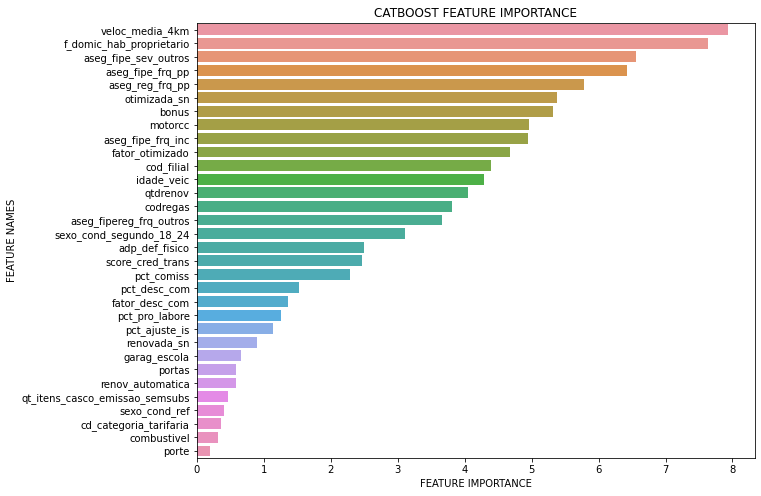

In [177]:
cat_plot = plot_feature_importance(cat.get_feature_importance(),pp_freq_columns_X,'CATBOOST ')

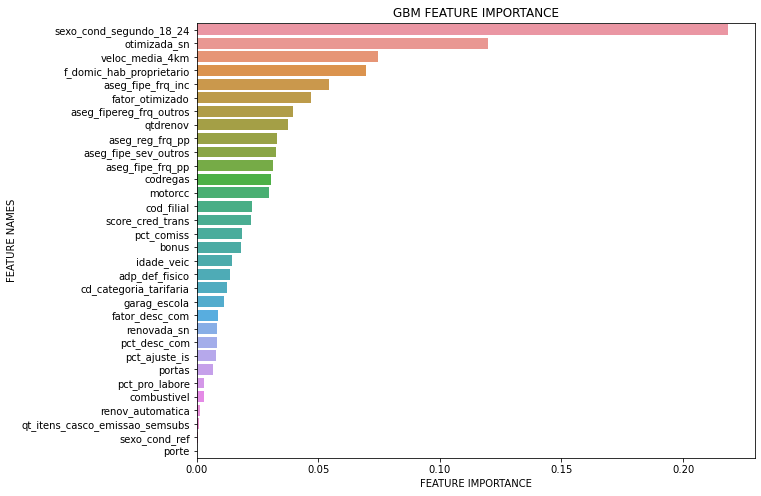

In [178]:
gbm_plot = plot_feature_importance(gbm.feature_importances_,pp_freq_columns_X,'GBM ')

In [24]:
score_model = pd.read_csv('score_models.csv')

In [28]:
pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.13f}'.format)
score_model

,dataset,ebm,catboost,gbm,glm
0,full,0.0354456130000,0.1145966904000,0.0345921644000,-0.0000008657000
1,downsizing(50%),0.0265139427000,0.0276998810000,0.0287857002000,-0.0001672087000
2,downsizing(10%),0.0338155950000,0.0335191451000,0.0353448704000,-0.0002731242000


### Full dataset & Downsizing

In [3]:
gc.collect()
df_pp_freq_sizing = pd.read_parquet("df_full_downsizing.parquet", engine='pyarrow')
gc.collect()

0

In [4]:
df_pp_freq_sizing.drop(['gmi_casco_pp','gmi_casco_pt','gmi_casco_rt','frequencia_casco_rt','frequencia_casco_pt','id'], axis='columns', inplace=True)

In [5]:
df_pp_freq_sizing.shape

(32698, 166)

In [6]:
pp_freq_columns_X =['mes_ref' , 'carga' , 'cd_categoria_tarifaria' , 'codregas' , 'cv', 'fator_rateio_casco' , 'fipe' , 'idade_veic' , 'is_casco_ajust_emissao_semsubs', 'is_casco_emissao_semsubs' , 'motorcc' , 'passageiros' , 'pct_ajuste_is', 'perc_franquia' , 'peso' , 'portas' , 'pr_an_casco_emissao_semsubs', 'qt_itens_casco_emissao_semsubs' , 'vl_adic_frac' , 'vl_franquia' , 'bonus', 'cod_agrupador' , 'cod_conta' , 'cod_filial' , 'cod_forma_pagto' , 'cod_plano','fator_desc_com' , 'fator_otimizado' , 'fator_renovacao','idade_cond_principal' , 'pct_agenciamento' , 'pct_comiss' , 'pct_desc','pct_desc_agravo' , 'pct_desc_com' , 'pct_desc_especial','pct_desc_fidelidade' , 'pct_desc_promocional' , 'pct_pro_labore','pontuacao_total_calculada' , 'qt_parcelas' , 'densidade_populacional','f_domic_4_residentes' , 'f_domic_concess_energia','f_domic_hab_proprietario' , 'f_domic_renda_entre1e2sm','f_domic_rua_com_identificacao' , 'f_domic_rua_com_iluminacao','f_domic_rua_com_meiofio' , 'f_domic_rua_pavimentada' , 'f_domic_sem_renda','f_idosos' , 'num_domicilios_particulares' , 'num_moradores','num_pontosdeonibus_4km' , 'num_ruas_4km' , 'populacao','qtd_sinistros_cpf_rns' , 'qtd_sinistros_pt_cpf_rns','qtd_sinistros_roubo_cpf_rns' , 'qtdrenov' , 'renda_mensal_media','score_cred' , 'score_cred_trans' , 'score_personalizado','tempo_ultimo_sinistro_cpf_rns' , 'tempo_ultimo_sinistro_pt_cpf','veloc_media_4km' , 'aseg_fipe_frq_inc' , 'aseg_fipe_frq_outros','aseg_fipe_frq_pp' , 'aseg_fipe_frq_pt' , 'aseg_fipe_frq_rt','aseg_fipe_sev_inc' , 'aseg_fipe_sev_outros' , 'aseg_fipe_sev_pp','aseg_fipe_sev_pt' , 'aseg_fipe_sev_rt' , 'aseg_fipereg_frq_inc','aseg_fipereg_frq_outros' , 'aseg_fipereg_frq_pp' , 'aseg_fipereg_frq_pt', 'aseg_fipereg_frq_rt' , 'aseg_fipereg_sev_inc' , 'aseg_fipereg_sev_outros','aseg_fipereg_sev_pp' , 'aseg_fipereg_sev_pt' , 'aseg_fipereg_sev_rt','aseg_reg_frq_inc' , 'aseg_reg_frq_outros' , 'aseg_reg_frq_pp','aseg_reg_frq_pt' , 'aseg_reg_frq_rt' , 'aseg_reg_sev_inc','aseg_reg_sev_outros' , 'aseg_reg_sev_pp' , 'aseg_reg_sev_pt','aseg_reg_sev_rt' , 'adp_blindagem' , 'adp_def_fisico' , 'adp_gas_natural','agrup_metodologia_seg_corr' , 'agrup_veic_emb' , 'cambio' , 'caracteristica','categoria' , 'cidade' , 'clau_daf' , 'clau_daf_desc' , 'clau_ind_int','clau_lojack' , 'clau_tipo_antifurto' , 'clausulas_daf' , 'combustivel','configuracao' , 'daf_demais_sn' , 'daf_dna_security_sn' , 'daf_lojack_sn','daf_rastreador_sn' , 'desc_fidelidade_sn' , 'desc_regional' , 'desc_utl_veic','ds_regbase_emb' , 'dsc_especial_0km_sn' , 'est_civ_cond_ref','estende_cob_18_24' , 'fabricante' , 'forma_pagto' , 'garag_escola','garag_pernoite' , 'garag_trab' , 'garant0km12m_sn' , 'garant0km6m_sn','grupo_regiao' , 'grupo_veic' , 'importacao' , 'ind_renov_autom','km_anual_faixa' , 'km_mensal_faixa' , 'marca' , 'metodologia_seg_corr','otimizada_sn' , 'perfil_personalizado' , 'porte' , 'qtd_veic_possue','regestudo' , 'renov_automatica' , 'renov_sin_sn' , 'renovacao' , 'renovada_sn','residentes_18_24' , 'sexo_cond_principal' , 'sexo_cond_ref','sexo_cond_segundo_18_24' , 'tipo_antifurto' , 'uf' , 'uso_comercial','vba_desc_assis' , 'vba_desc_assresid' , 'vba_desc_cr_desc','vba_desc_cr_even' , 'vba_desc_cr_indi' , 'vba_desc_cr_terc','vba_desc_vidros' , 'veic_zkm_sn']

#### EBM

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq_sizing.values[:,0:165],df_pp_freq_sizing.values[:,165], 
                                                    test_size=0.33,random_state=42)

In [8]:
ebm = ExplainableBoostingRegressor(feature_names=pp_freq_columns_X, random_state=42)

In [9]:
gc.collect()
ebm.fit(X_train, Y_train)
gc.collect()

INFO:MainThread:interpret.glassbox.ebm.internal:EBM lib loading.
INFO:MainThread:interpret.glassbox.ebm.internal:Loading native on win32 | debug = False


0

In [10]:
ebm_pred = ebm.predict(X_test)

In [11]:
ebm.score(X_test,Y_test)

0.023136687867512107

#### Catboost

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq_sizing.values[:,0:165],df_pp_freq_sizing.values[:,165], 
                                                    test_size=0.33, random_state=42)

In [15]:
cat = CatBoostRegressor(loss_function='RMSE')

In [16]:
gc.collect()
cat.fit(X_train, Y_train)
gc.collect()

Learning rate set to 0.067612
0:	learn: 8.2428054	total: 323ms	remaining: 5m 22s
1:	learn: 8.2196326	total: 351ms	remaining: 2m 55s
2:	learn: 8.1987850	total: 382ms	remaining: 2m 7s
3:	learn: 8.1785548	total: 417ms	remaining: 1m 43s
4:	learn: 8.1609787	total: 444ms	remaining: 1m 28s
5:	learn: 8.1501990	total: 471ms	remaining: 1m 17s
6:	learn: 8.1324821	total: 496ms	remaining: 1m 10s
7:	learn: 8.1237343	total: 521ms	remaining: 1m 4s
8:	learn: 8.1076260	total: 551ms	remaining: 1m
9:	learn: 8.0919393	total: 579ms	remaining: 57.3s
10:	learn: 8.0771712	total: 608ms	remaining: 54.6s
11:	learn: 8.0677584	total: 630ms	remaining: 51.9s
12:	learn: 8.0590175	total: 659ms	remaining: 50.1s
13:	learn: 8.0505579	total: 689ms	remaining: 48.5s
14:	learn: 8.0454599	total: 721ms	remaining: 47.3s
15:	learn: 8.0354430	total: 763ms	remaining: 46.9s
16:	learn: 8.0191677	total: 796ms	remaining: 46s
17:	learn: 8.0110818	total: 827ms	remaining: 45.1s
18:	learn: 8.0006418	total: 859ms	remaining: 44.4s
19:	learn:

161:	learn: 7.3244385	total: 5.51s	remaining: 28.5s
162:	learn: 7.3228676	total: 5.54s	remaining: 28.4s
163:	learn: 7.3197734	total: 5.57s	remaining: 28.4s
164:	learn: 7.3180229	total: 5.61s	remaining: 28.4s
165:	learn: 7.3147007	total: 5.64s	remaining: 28.3s
166:	learn: 7.3132115	total: 5.67s	remaining: 28.3s
167:	learn: 7.3076771	total: 5.71s	remaining: 28.3s
168:	learn: 7.3048578	total: 5.74s	remaining: 28.2s
169:	learn: 7.2976422	total: 5.78s	remaining: 28.2s
170:	learn: 7.2947621	total: 5.81s	remaining: 28.2s
171:	learn: 7.2894715	total: 5.84s	remaining: 28.1s
172:	learn: 7.2843082	total: 5.88s	remaining: 28.1s
173:	learn: 7.2803398	total: 5.92s	remaining: 28.1s
174:	learn: 7.2743130	total: 5.95s	remaining: 28s
175:	learn: 7.2643243	total: 5.98s	remaining: 28s
176:	learn: 7.2616980	total: 6.01s	remaining: 27.9s
177:	learn: 7.2598583	total: 6.05s	remaining: 27.9s
178:	learn: 7.2540597	total: 6.09s	remaining: 27.9s
179:	learn: 7.2525323	total: 6.13s	remaining: 27.9s
180:	learn: 7.24

326:	learn: 6.8360215	total: 11.1s	remaining: 22.9s
327:	learn: 6.8349042	total: 11.1s	remaining: 22.8s
328:	learn: 6.8328546	total: 11.2s	remaining: 22.8s
329:	learn: 6.8289097	total: 11.2s	remaining: 22.7s
330:	learn: 6.8272349	total: 11.2s	remaining: 22.7s
331:	learn: 6.8234731	total: 11.3s	remaining: 22.7s
332:	learn: 6.8191422	total: 11.3s	remaining: 22.7s
333:	learn: 6.8168516	total: 11.3s	remaining: 22.6s
334:	learn: 6.8152658	total: 11.4s	remaining: 22.6s
335:	learn: 6.8134530	total: 11.4s	remaining: 22.5s
336:	learn: 6.8122309	total: 11.4s	remaining: 22.5s
337:	learn: 6.8098246	total: 11.5s	remaining: 22.4s
338:	learn: 6.8088182	total: 11.5s	remaining: 22.4s
339:	learn: 6.8056388	total: 11.5s	remaining: 22.4s
340:	learn: 6.8047595	total: 11.6s	remaining: 22.4s
341:	learn: 6.8038200	total: 11.6s	remaining: 22.3s
342:	learn: 6.8025459	total: 11.6s	remaining: 22.3s
343:	learn: 6.7991987	total: 11.7s	remaining: 22.2s
344:	learn: 6.7981201	total: 11.7s	remaining: 22.2s
345:	learn: 

485:	learn: 6.5346783	total: 16.2s	remaining: 17.1s
486:	learn: 6.5332502	total: 16.2s	remaining: 17.1s
487:	learn: 6.5313565	total: 16.3s	remaining: 17.1s
488:	learn: 6.5297971	total: 16.3s	remaining: 17s
489:	learn: 6.5279313	total: 16.3s	remaining: 17s
490:	learn: 6.5264889	total: 16.3s	remaining: 16.9s
491:	learn: 6.5252707	total: 16.4s	remaining: 16.9s
492:	learn: 6.5236635	total: 16.4s	remaining: 16.9s
493:	learn: 6.5217187	total: 16.4s	remaining: 16.8s
494:	learn: 6.5202428	total: 16.5s	remaining: 16.8s
495:	learn: 6.5187289	total: 16.5s	remaining: 16.8s
496:	learn: 6.5177890	total: 16.5s	remaining: 16.7s
497:	learn: 6.5167144	total: 16.5s	remaining: 16.7s
498:	learn: 6.5148895	total: 16.6s	remaining: 16.6s
499:	learn: 6.5133565	total: 16.6s	remaining: 16.6s
500:	learn: 6.5108304	total: 16.6s	remaining: 16.6s
501:	learn: 6.5097111	total: 16.7s	remaining: 16.5s
502:	learn: 6.5075830	total: 16.7s	remaining: 16.5s
503:	learn: 6.5068629	total: 16.7s	remaining: 16.5s
504:	learn: 6.50

650:	learn: 6.2661315	total: 20.9s	remaining: 11.2s
651:	learn: 6.2652958	total: 20.9s	remaining: 11.2s
652:	learn: 6.2642196	total: 20.9s	remaining: 11.1s
653:	learn: 6.2621232	total: 21s	remaining: 11.1s
654:	learn: 6.2604104	total: 21s	remaining: 11.1s
655:	learn: 6.2589691	total: 21s	remaining: 11s
656:	learn: 6.2573352	total: 21.1s	remaining: 11s
657:	learn: 6.2558849	total: 21.1s	remaining: 11s
658:	learn: 6.2537163	total: 21.1s	remaining: 10.9s
659:	learn: 6.2522662	total: 21.1s	remaining: 10.9s
660:	learn: 6.2504290	total: 21.2s	remaining: 10.9s
661:	learn: 6.2487560	total: 21.2s	remaining: 10.8s
662:	learn: 6.2475656	total: 21.2s	remaining: 10.8s
663:	learn: 6.2457909	total: 21.3s	remaining: 10.8s
664:	learn: 6.2442915	total: 21.3s	remaining: 10.7s
665:	learn: 6.2424269	total: 21.3s	remaining: 10.7s
666:	learn: 6.2409058	total: 21.4s	remaining: 10.7s
667:	learn: 6.2391963	total: 21.4s	remaining: 10.6s
668:	learn: 6.2376864	total: 21.4s	remaining: 10.6s
669:	learn: 6.2363003	to

813:	learn: 6.0437677	total: 25.4s	remaining: 5.81s
814:	learn: 6.0428414	total: 25.4s	remaining: 5.78s
815:	learn: 6.0424623	total: 25.5s	remaining: 5.74s
816:	learn: 6.0413644	total: 25.5s	remaining: 5.71s
817:	learn: 6.0402959	total: 25.5s	remaining: 5.68s
818:	learn: 6.0386016	total: 25.5s	remaining: 5.64s
819:	learn: 6.0379171	total: 25.6s	remaining: 5.61s
820:	learn: 6.0364908	total: 25.6s	remaining: 5.58s
821:	learn: 6.0354684	total: 25.6s	remaining: 5.54s
822:	learn: 6.0342721	total: 25.6s	remaining: 5.51s
823:	learn: 6.0330661	total: 25.7s	remaining: 5.48s
824:	learn: 6.0322612	total: 25.7s	remaining: 5.45s
825:	learn: 6.0305213	total: 25.7s	remaining: 5.42s
826:	learn: 6.0295265	total: 25.8s	remaining: 5.39s
827:	learn: 6.0283484	total: 25.8s	remaining: 5.36s
828:	learn: 6.0270063	total: 25.8s	remaining: 5.33s
829:	learn: 6.0254968	total: 25.9s	remaining: 5.29s
830:	learn: 6.0240747	total: 25.9s	remaining: 5.26s
831:	learn: 6.0227411	total: 25.9s	remaining: 5.23s
832:	learn: 

977:	learn: 5.8370530	total: 29.6s	remaining: 667ms
978:	learn: 5.8358870	total: 29.7s	remaining: 636ms
979:	learn: 5.8347569	total: 29.7s	remaining: 606ms
980:	learn: 5.8334044	total: 29.7s	remaining: 575ms
981:	learn: 5.8329648	total: 29.7s	remaining: 545ms
982:	learn: 5.8316227	total: 29.8s	remaining: 515ms
983:	learn: 5.8304036	total: 29.8s	remaining: 484ms
984:	learn: 5.8288939	total: 29.8s	remaining: 454ms
985:	learn: 5.8275276	total: 29.8s	remaining: 424ms
986:	learn: 5.8265918	total: 29.9s	remaining: 393ms
987:	learn: 5.8253498	total: 29.9s	remaining: 363ms
988:	learn: 5.8244218	total: 29.9s	remaining: 333ms
989:	learn: 5.8229290	total: 29.9s	remaining: 302ms
990:	learn: 5.8212554	total: 30s	remaining: 272ms
991:	learn: 5.8204321	total: 30s	remaining: 242ms
992:	learn: 5.8189627	total: 30s	remaining: 212ms
993:	learn: 5.8174748	total: 30.1s	remaining: 181ms
994:	learn: 5.8162310	total: 30.1s	remaining: 151ms
995:	learn: 5.8153253	total: 30.1s	remaining: 121ms
996:	learn: 5.8142

0

In [17]:
cat_pred = cat.predict(X_test)

In [18]:
cat.score(X_test, Y_test)

0.011857357031739402

#### GBM

In [104]:
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq_sizing.values[:,0:165], df_pp_freq_sizing.values[:,165], 
                                                    test_size=0.33, random_state=42)

In [105]:
gbm = GradientBoostingRegressor(random_state=42)

In [106]:
gc.collect()
gbm.fit(X_train, Y_train)
gc.collect()

0

In [107]:
gbm_pred = gbm.predict(X_test)

In [108]:
gbm.score(X_test,Y_test)

0.021598646240654773

#### GLM

In [123]:
X_train, X_test, Y_train, Y_test = train_test_split(df_pp_freq_sizing.values[:,0:165], df_pp_freq_sizing.values[:,165], 
                                                    test_size=0.33, random_state=42)

In [124]:
pss = PoissonRegressor()

In [125]:
gc.collect()
pss.fit(X_train, Y_train)
gc.collect()

overflow encountered in exp
overflow encountered in exp
divide by zero encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in multiply
divide by zero encountered in true_divide
invalid value encountered in true_divide
invalid value encountered in add
lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html


32

In [126]:
pss_pred = pss.predict(X_test)

In [127]:
pss.score(X_test, Y_test)

-5.58094378955154e-06

## 08-Interpretability

In [166]:
shap.initjs()

#### EBM

In [134]:
explainer_ebm = shap.Explainer(ebm, feature_names=pp_freq_columns_X)

Exception: The passed model is not callable and cannot be analyzed directly with the given masker! Model: ExplainableBoostingRegressor(feature_names=['mes_ref', 'carga',
                                            'cd_categoria_tarifaria',
                                            'codregas', 'cv',
                                            'fator_rateio_casco', 'fipe',
                                            'idade_veic',
                                            'is_casco_ajust_emissao_semsubs',
                                            'is_casco_emissao_semsubs',
                                            'motorcc', 'passageiros',
                                            'pct_ajuste_is', 'perc_franquia',
                                            'peso', 'portas',
                                            'pr_an_casco_emissao_semsubs',
                                            'qt_itens_casco_emissao_semsubs',
                                            'vl_adic_fr...
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'categorical',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous',
                                            'continuous', 'continuous', ...])

In [ ]:
shap_values = explainer(X_test)

In [ ]:
ind = 0
shap.plots.force(shap_values[ind])

In [ ]:
shap.summary_plot(shap_values, X_test)

#### Catboost

In [28]:
explainer_cat = shap.Explainer(cat, feature_names=pp_freq_columns_X)

In [29]:
shap_values_cat = explainer_cat(X_test)

In [158]:
explainer_cat_tre = shap.TreeExplainer(cat, feature_names=pp_freq_columns_X)

In [159]:
shap_values_cat_tre = explainer_cat_tre.shap_values(X_test)

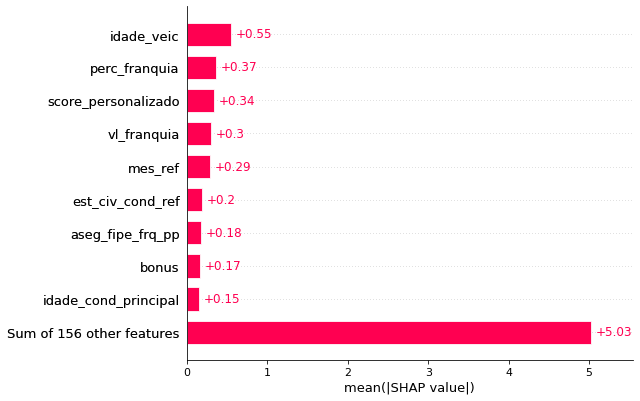

In [90]:
shap.plots.bar(shap_values_cat)

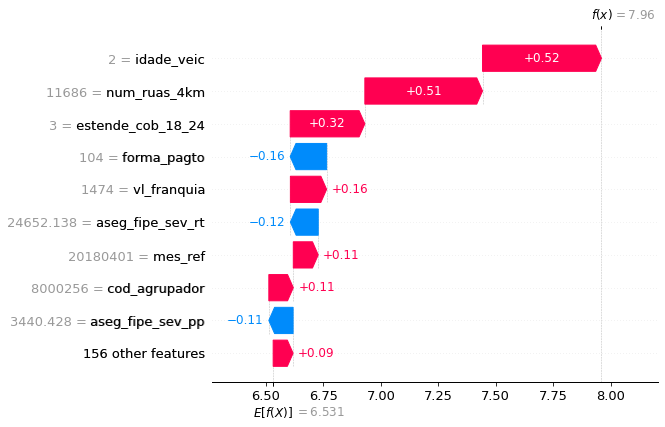

In [30]:
shap.plots.waterfall(shap_values_cat[0])

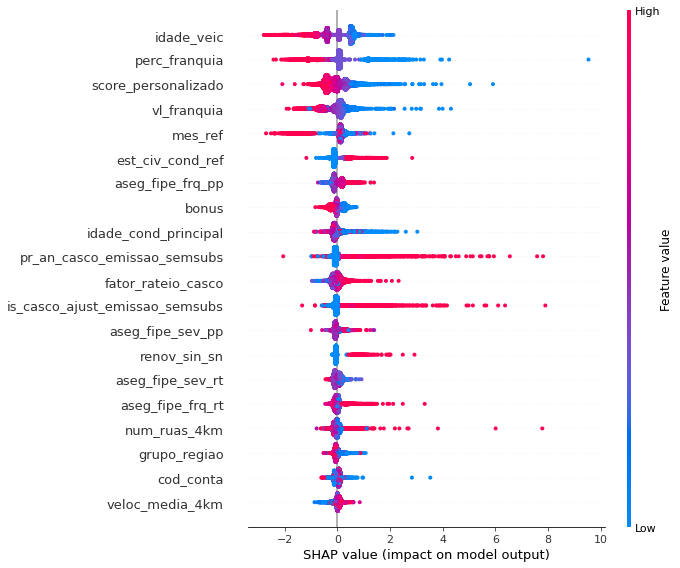

In [31]:
shap.summary_plot(shap_values_cat, X_test)

In [34]:
shap.plots.force(shap_values_cat[0])

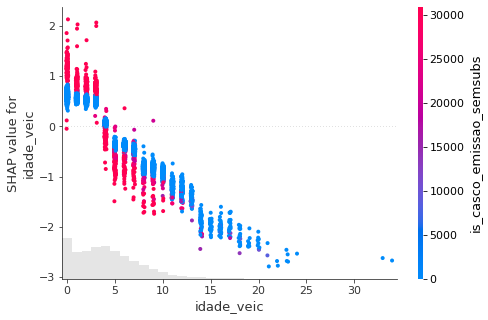

In [35]:
shap.plots.scatter(shap_values_cat[:,"idade_veic"], color=shap_values)

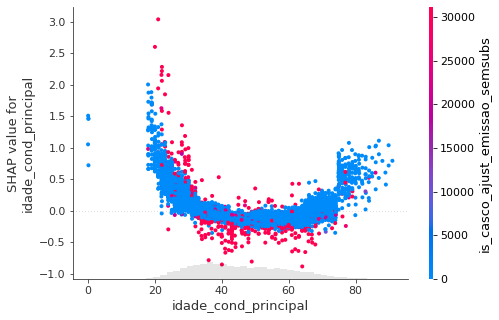

In [36]:
shap.plots.scatter(shap_values_cat[:,"idade_cond_principal"], color=shap_values)

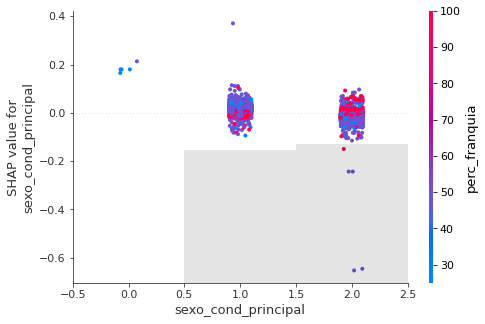

In [41]:
shap.plots.scatter(shap_values_cat[:,"sexo_cond_principal"], color=shap_values)

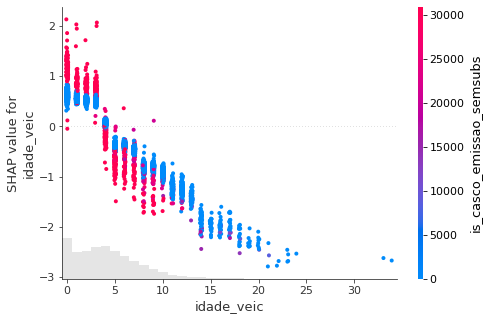

In [152]:
shap.plots.scatter(shap_values_cat[:,"idade_veic"], color=shap_values)

In [172]:
from sklearn.inspection import plot_partial_dependence

In [174]:
plot_partial_dependence(cat, X_test,df_pp_freq_sizing["idade_veic"])

NotFittedError: This CatBoostRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

#### GBM

In [109]:
explainer_gbm = shap.Explainer(gbm, feature_names=pp_freq_columns_X)

In [110]:
shap_values_gbm = explainer_gbm(X_test)

In [111]:
explainer_gbm_tre = shap.TreeExplainer(gbm, feature_names=pp_freq_columns_X)

In [112]:
shap_values_gbm_tre = explainer_gbm_tre.shap_values(X_test)

In [ ]:
shap.plots.waterfall(shap_values_gbm[0])

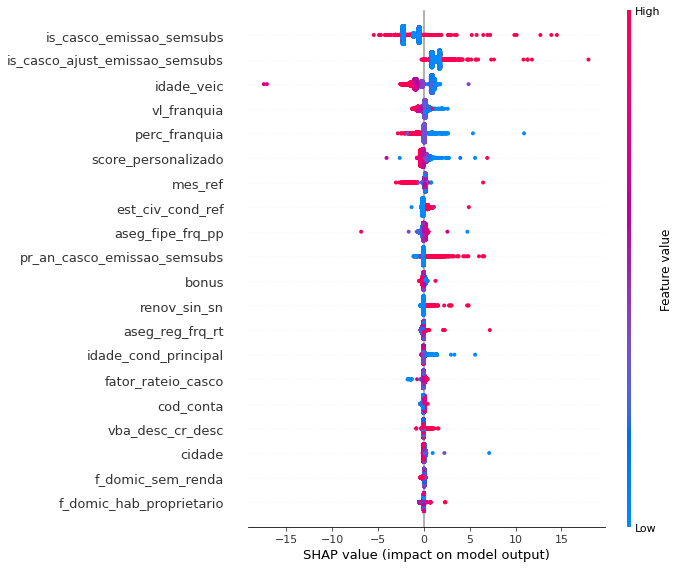

In [116]:
shap.summary_plot(shap_values_gbm, X_test)

In [117]:
shap.plots.force(shap_values_gbm[0])

In [ ]:
shap.plots.scatter(shap_values_gbm["idade_veic"], color=shap_values_gbm)

In [ ]:
shap.plots.scatter(shap_values_gbm[:,"idade_cond_principal"], color=shap_values_gbm)

In [ ]:
shap.plots.scatter(shap_values_gbm[:,"sexo_cond_principal"], color=shap_values_gbm)

In [ ]:
plot_partial_dependence(gbm, X_test,df_pp_freq_sizing["idade_veic"])

In [176]:
plot_partial_dependence(ebm, X_test,df_pp_freq_sizing["idade_veic"])

KeyboardInterrupt: 

#### GLM

In [ ]:
explainer = shap.Explainer(pss, feature_names=pp_freq_columns_X)

In [ ]:
shap_values = explainer(X_test)

In [ ]:
explainer_glm_tre = shap.TreeExplainer(pss, feature_names=pp_freq_columns_X)

In [ ]:
shap_values_glm_tre = explainer_glm_tre.shap_values(X_test)

In [ ]:
shap.plots.waterfall(shap_values_glm[0])

In [ ]:
shap.summary_plot(shap_values_glm, X_test)

In [ ]:
shap.plots.force(shap_values_glm[0])

In [ ]:
shap.plots.scatter(shap_values_glm[:,"idade_veic"], color=shap_values_glm)

In [ ]:
shap.plots.scatter(shap_values_glm[:,"idade_cond_principal"], color=shap_values_glm)

In [ ]:
shap.plots.scatter(shap_values_glm[:,"sexo_cond_principal"], color=shap_values_glm)

In [75]:
import ipywidgets as widgets

In [ ]:
# Create the list of all labels for the drop down list
list_of_labels = pp_freq_columns_X

# Create a list of tuples so that the index of the label is what is returned
tuple_of_labels = list(zip(list_of_labels, range(len(list_of_labels))))

# Create a widget for the labels and then display the widget
current_label = widgets.Dropdown(options=tuple_of_labels,
                              value=0,
                              description='Select Label:'
                              )

# Display the dropdown list (Note: access index value with 'current_label.value')


In [ ]:
print(f'Current Label Shown: {list_of_labels[current_label.value]}\n')

shap.force_plot(base_value = explainer_cat.expected_value[current_label.value],
                shap_values = shap_values_cat[current_label.value]
                )